# **Installing and Importing Dependencies**

In [2]:
!pip install ucimlrepo

In [3]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.4-py2.py3-none-any.whl size=240946579 sha256=f124b6280a116c6909a3061857ed9579c5bb9a41b1c65a2dda46b08b7088c5e0
  Stored in directory: /root/.cache/pip/wheels/37/28/b3/cef333e263c19c1b1f0fef7d9203e85aa4635a54ef7d1b4ba6
Successfully built h2o


# **Fetching the Dataset**

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [5]:
adult

{'data': {'ids': None,
  'features':        age         workclass  fnlwgt  education  education-num  \
  0       39         State-gov   77516  Bachelors             13   
  1       50  Self-emp-not-inc   83311  Bachelors             13   
  2       38           Private  215646    HS-grad              9   
  3       53           Private  234721       11th              7   
  4       28           Private  338409  Bachelors             13   
  ...    ...               ...     ...        ...            ...   
  48837   39           Private  215419  Bachelors             13   
  48838   64               NaN  321403    HS-grad              9   
  48839   38           Private  374983  Bachelors             13   
  48840   44           Private   83891  Bachelors             13   
  48841   35      Self-emp-inc  182148  Bachelors             13   
  
             marital-status         occupation    relationship  \
  0           Never-married       Adm-clerical   Not-in-family   
  1      Marri

In [6]:
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpccn_t872
  JVM stdout: /tmp/tmpccn_t872/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpccn_t872/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.4
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_6h0mhd
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [7]:
import pandas as pd

# Assuming dotdict_obj is your ucimlrepo.dotdict.dotdict object
# Extract features and target variables (adjust this part based on your data structure)
features = pd.DataFrame(adult.data.features)
target = pd.DataFrame(adult.data.targets)

# Concatenate the DataFrames by columns
data = pd.concat([features, target], axis=1)

# Display the concatenated DataFrame
data

age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  income  
0      United-States   <=50K  
1      United-States   <=50K  
2      United-States   <=50K  
3      United-States   <=50K  
4               Cuba   <=50K  
...              ...     ...  
48837  United-States  <=50K.  
48838  United-States  <=50K.  
48839  United-States  <=50K.  
48840  United-States  <=50K.  
48841  United-States   >50K.  

[48842 rows x 15 columns]

# **Model Building using AutoML**

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (adjust the test_size as needed)
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

In [9]:
# Convert Pandas DataFrames to H2O Frames
train = H2OFrame(X_train)
test = H2OFrame(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
# Identify predictors and response columns
x = train.columns
y = "income"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_runtime_secs = 60, seed=1)  #max_runtime_secs = 60, max_models=20
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

# model_id                                                  auc    logloss    mean_per_class_error      rmse       mse
# ---------------------------------------------------  --------  ---------  ----------------------  --------  --------
# StackedEnsemble_AllModels_AutoML_20181212_105540     0.789801   0.551109                0.333174  0.43211   0.186719
# StackedEnsemble_BestOfFamily_AutoML_20181212_105540  0.788425   0.552145                0.323192  0.432625  0.187165
# XGBoost_1_AutoML_20181212_105540                     0.784651   0.55753                 0.325471  0.434949  0.189181
# XGBoost_grid_1_AutoML_20181212_105540_model_4        0.783523   0.557854                0.318819  0.435249  0.189441
# XGBoost_grid_1_AutoML_20181212_105540_model_3        0.783004   0.559613                0.325081  0.435708  0.189841
# XGBoost_2_AutoML_20181212_105540                     0.78136    0.55888                 0.347074  0.435907  0.190015
# XGBoost_3_AutoML_20181212_105540                     0.780847   0.559589                0.330739  0.43613   0.190209
# GBM_5_AutoML_20181212_105540                         0.780837   0.559903                0.340848  0.436191  0.190263
# GBM_2_AutoML_20181212_105540                         0.780036   0.559806                0.339926  0.436415  0.190458
# GBM_1_AutoML_20181212_105540                         0.779827   0.560857                0.335096  0.436616  0.190633
# GBM_3_AutoML_20181212_105540                         0.778669   0.56179                 0.325538  0.437189  0.191134
# XGBoost_grid_1_AutoML_20181212_105540_model_2        0.774411   0.575017                0.322811  0.4427    0.195984
# GBM_4_AutoML_20181212_105540                         0.771426   0.569712                0.33742   0.44107   0.194543
# GBM_grid_1_AutoML_20181212_105540_model_1            0.769752   0.572583                0.344331  0.442452  0.195764
# GBM_grid_1_AutoML_20181212_105540_model_2            0.754366   0.918567                0.355855  0.496638  0.246649
# DRF_1_AutoML_20181212_105540                         0.742892   0.595883                0.355403  0.452774  0.205004
# XRT_1_AutoML_20181212_105540                         0.742091   0.599346                0.356583  0.453117  0.205315
# DeepLearning_grid_1_AutoML_20181212_105540_model_2   0.741795   0.601497                0.368291  0.454904  0.206937
# XGBoost_grid_1_AutoML_20181212_105540_model_1        0.693554   0.620702                0.40588   0.465791  0.216961
# DeepLearning_1_AutoML_20181212_105540                0.69137    0.637954                0.409351  0.47178   0.222576
# DeepLearning_grid_1_AutoML_20181212_105540_model_1   0.690084   0.661794                0.418469  0.476635  0.227181
# GLM_grid_1_AutoML_20181212_105540_model_1            0.682648   0.63852                 0.397234  0.472683  0.223429
#
# [22 rows x 6 columns]

# The leader model is stored here
aml.leader

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20231008_162648


Model Summary: 
    number_of_trees
--  -----------------
    39

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.24341159245439276
RMSE: 0.4933676037747034
LogLoss: 0.6904510841247798
Mean Per-Class Error: 0.4171212206143027
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
<=50K    <=50K.    >50K    >50K.    Error      Rate
-------  --------  ------  -------  ---------  --------------
13006    241       506     48       0.0576045  795 / 13,801
4172     2350      331     50       0.659568   4,553 / 6,903
1019     81        3277    51       0.259937   1,151 / 4,428
594      94        795     662      0.691375   1,483 / 2,145
18791    2766      4909    811      0.292627   7,982 / 27,277

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.707372
2    0.932507
3    0.981633
4    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.32536651771568414
RMSE: 0.5704090792717839
LogLoss: 0.9103638719652939
Mean Per-Class Error: 0.5682556599995257
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
<=50K    <=50K.    >50K    >50K.    Error     Rate
-------  --------  ------  -------  --------  -------------
1743     130       104     6        0.121029  240 / 1,983
786      146       67      13       0.855731  866 / 1,012
180      14        322     40       0.420863  234 / 556
96       11        167     39       0.875399  274 / 313
2805     301       660     98       0.417702  1,614 / 3,864

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.582298
2    0.881211
3    0.947205
4    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2023-10-08 16:26:51  0.203 sec   0                  0.75             1.38629             0.74693                          nan             nan                0.75               1.38629               0.738095                           nan               nan
    2023-10-08 16:26:55  3.825 sec   5                  0.604847         0.957278            0.386223                         nan             nan                0.619182           1.0026                0.407867                           nan               nan
    2023-10-08 16:26:57  5.477 sec   10                 0.559539         0.84735             0.373941                         nan             nan                0.587138           0.930226              0.403986                           nan               nan
    2023-10-08 16:26:58  6.941 sec   15                 0.538613         0.798001            0.35858                          nan             nan                0.576487           0.909064              0.411749                           nan               nan
    2023-10-08 16

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error    logloss      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ----------------------  ---------  --------  --------  ------------------  -------------------------  ---------------
XGBoost_1_AutoML_1_20231008_162648                                     0.575481   0.917477  0.571505  0.326618               17940                   0.046325  XGBoost
GBM_1_AutoML_1_20231008_162648                                         0.581312   0.910928  0.574189  0.329693               16624                   0.094725  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20231008_162648                0.584475   0.899662  0.571173  0.326239                9484                   0.125454  StackedEnsemble
GLM_1_AutoML_1_20231008_162648                                         0.604331   0.929302  0.58221   0.338968               16523                   0.002391  GLM
[4 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_1_20231008_162648

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
<=50K    <=50K.    >50K    >50K.    Error     Rate
-------  --------  ------  -------  --------  -------------
4293     309       303     31       0.130267  643 / 4,936
1926     384       147     21       0.845036  2,094 / 2,478
503      45        910     104      0.417414  652 / 1,562
244      35        442     72       0.909206  721 / 793
6966     773       1802    228      0.420719  4,110 / 9,769

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

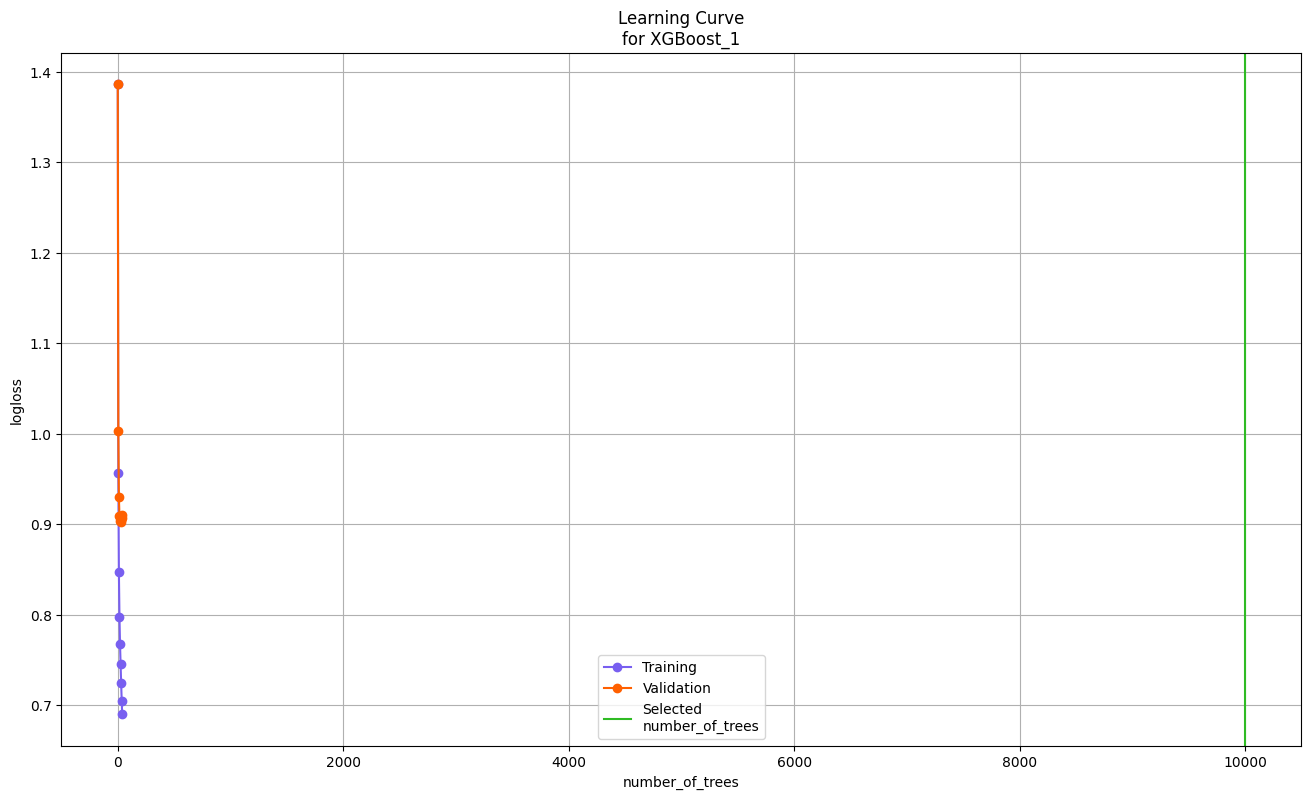

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

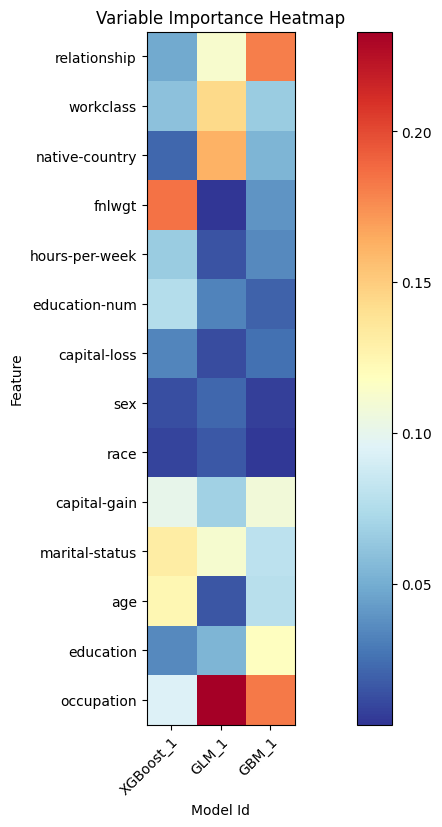

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'native-country' has levels not trained on: ["Holand-Netherlands"]
  warnings.warn(w)


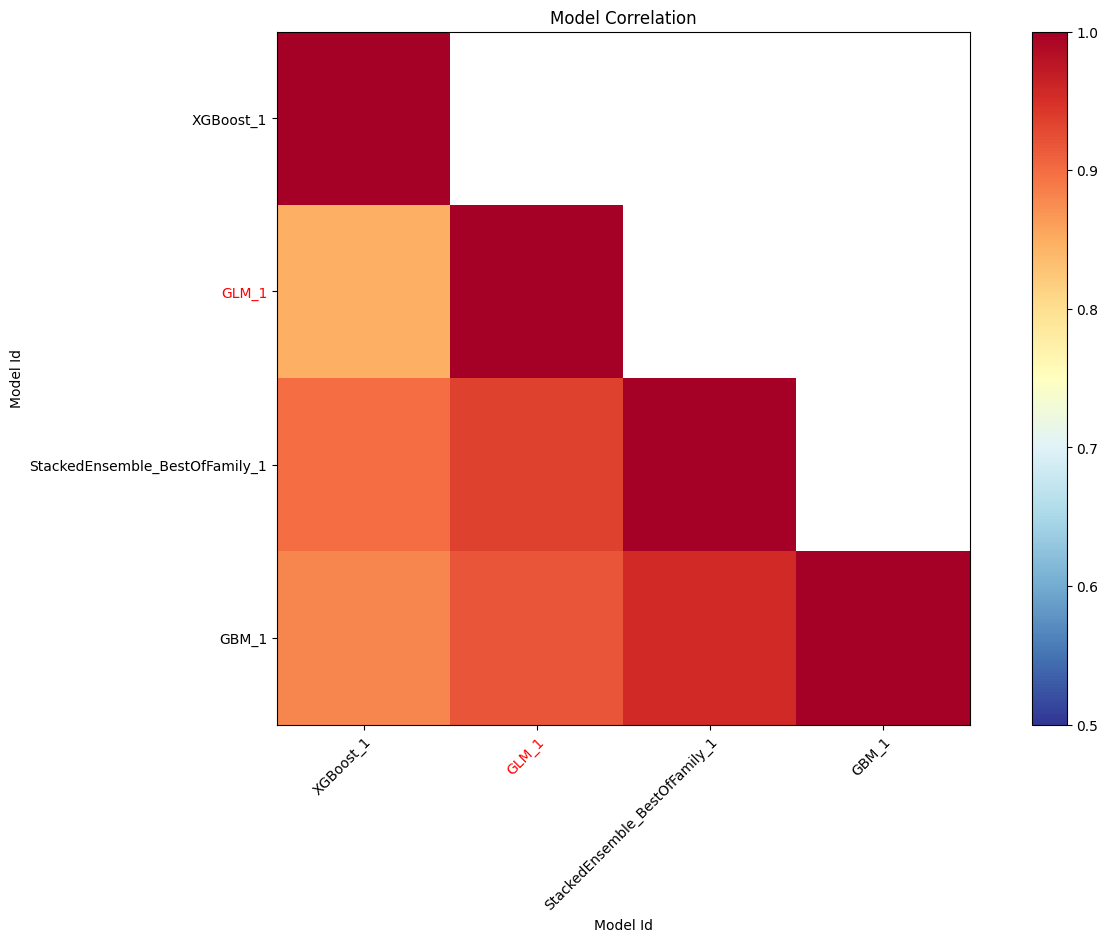

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

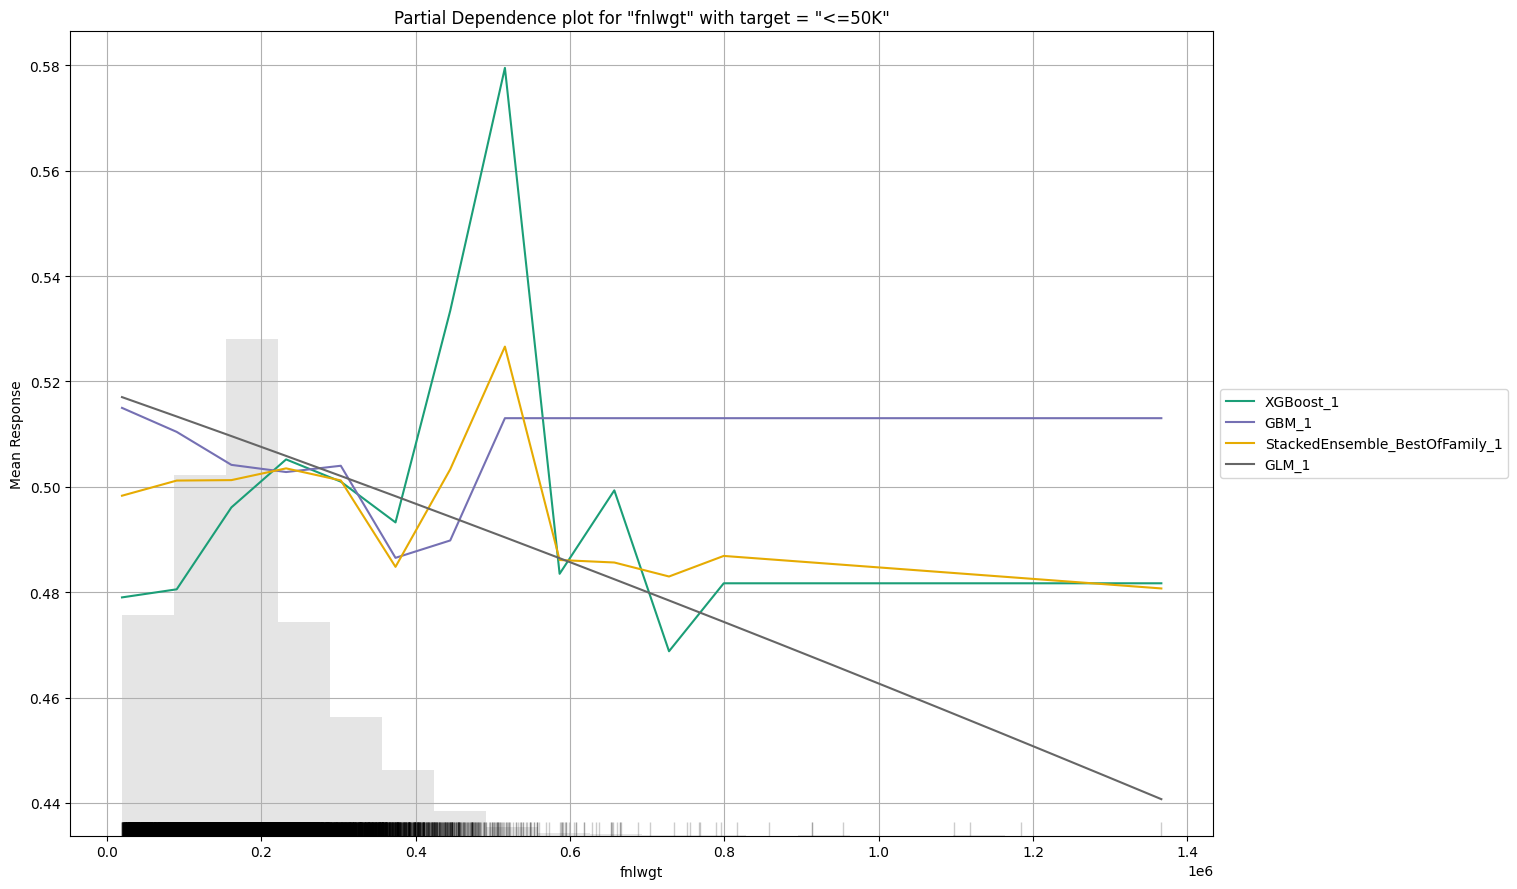

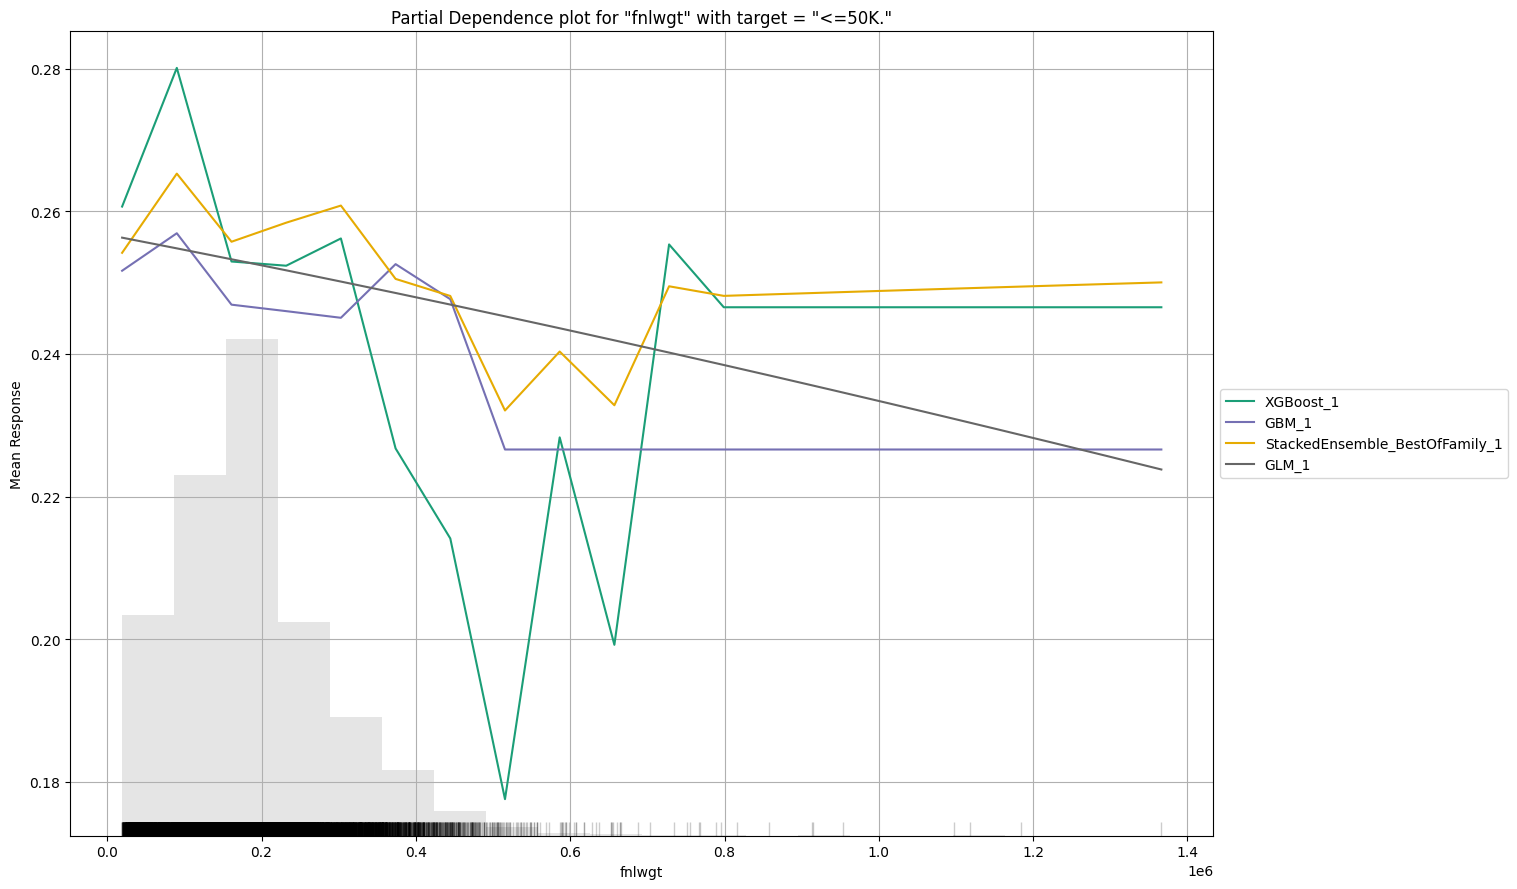

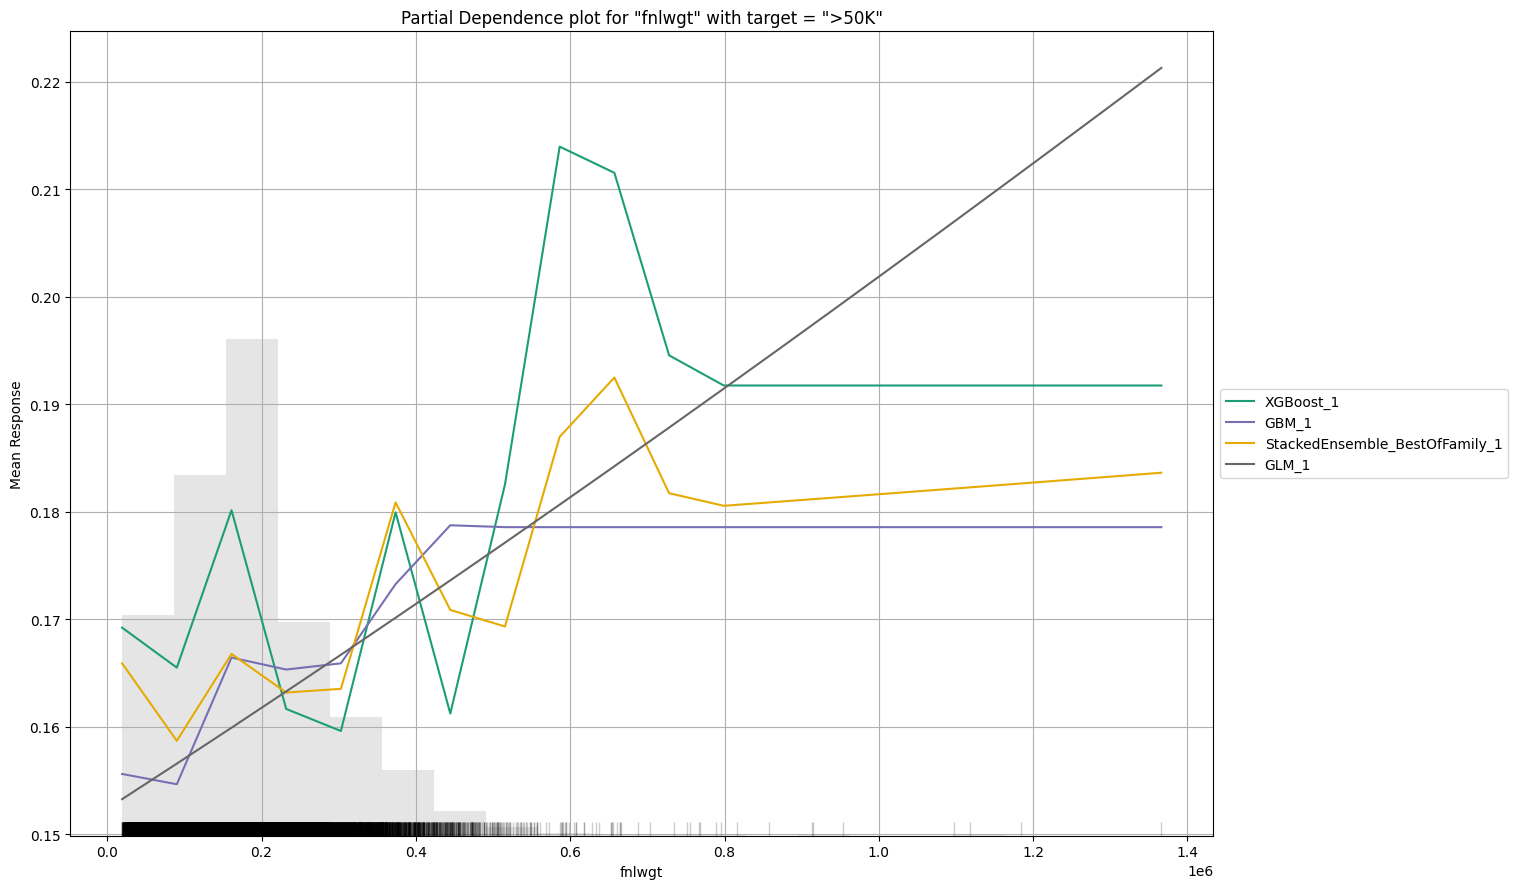

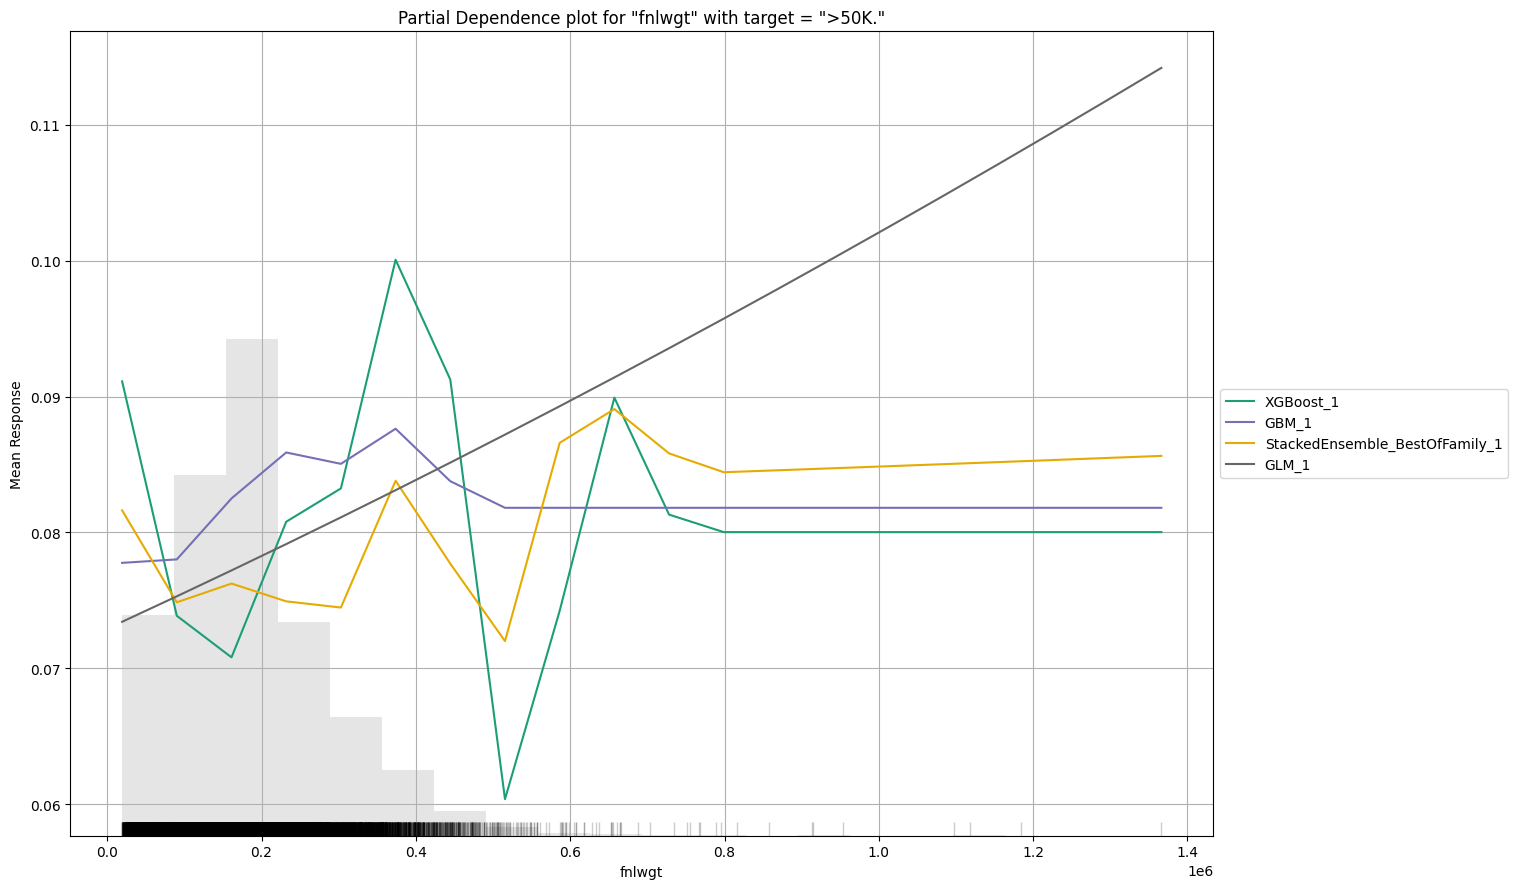

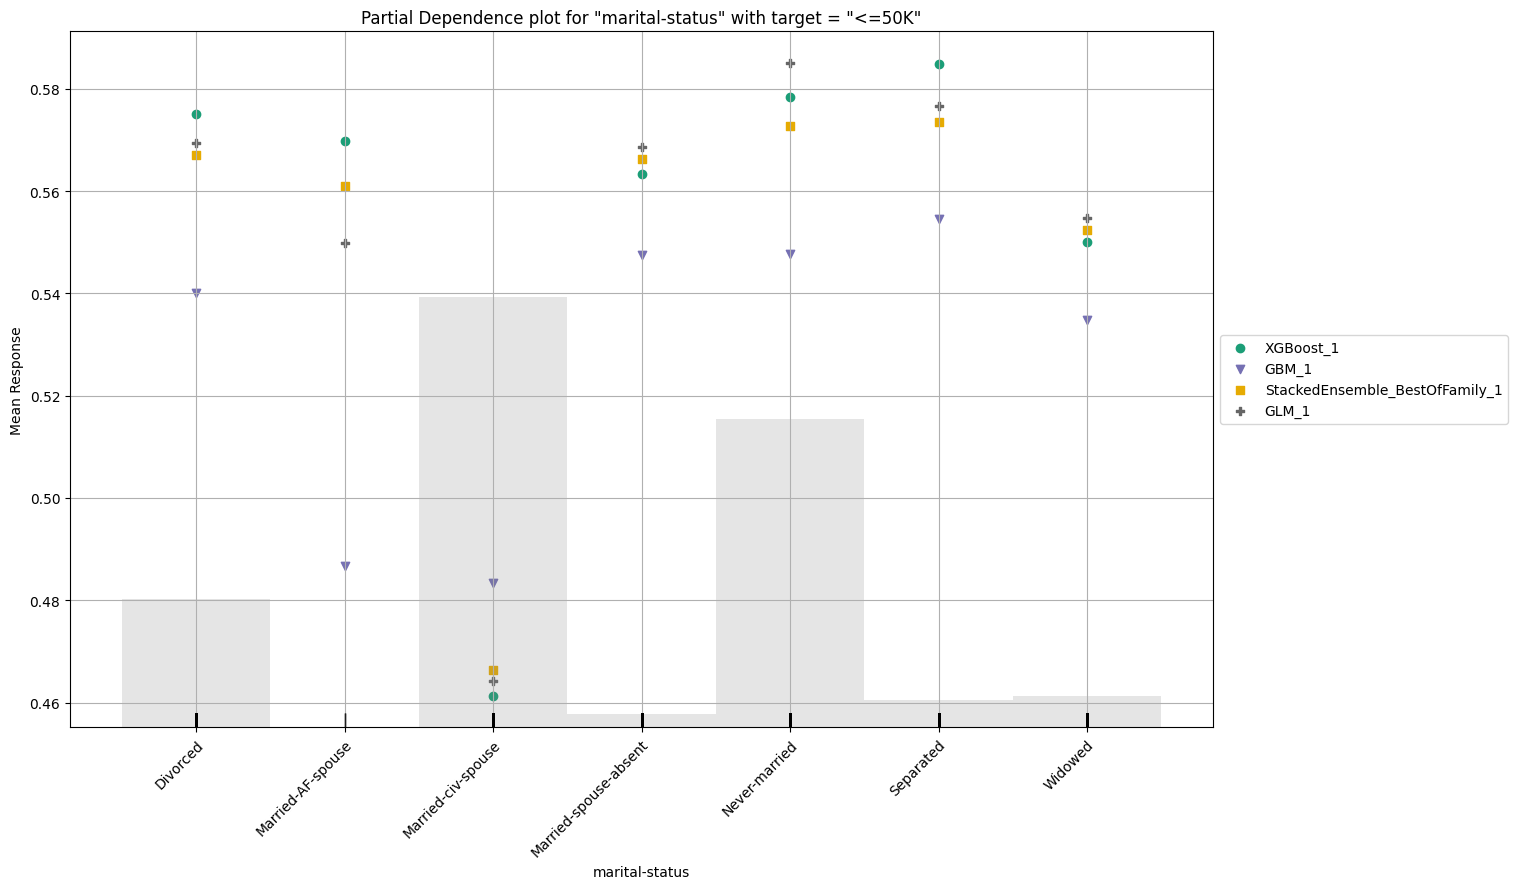

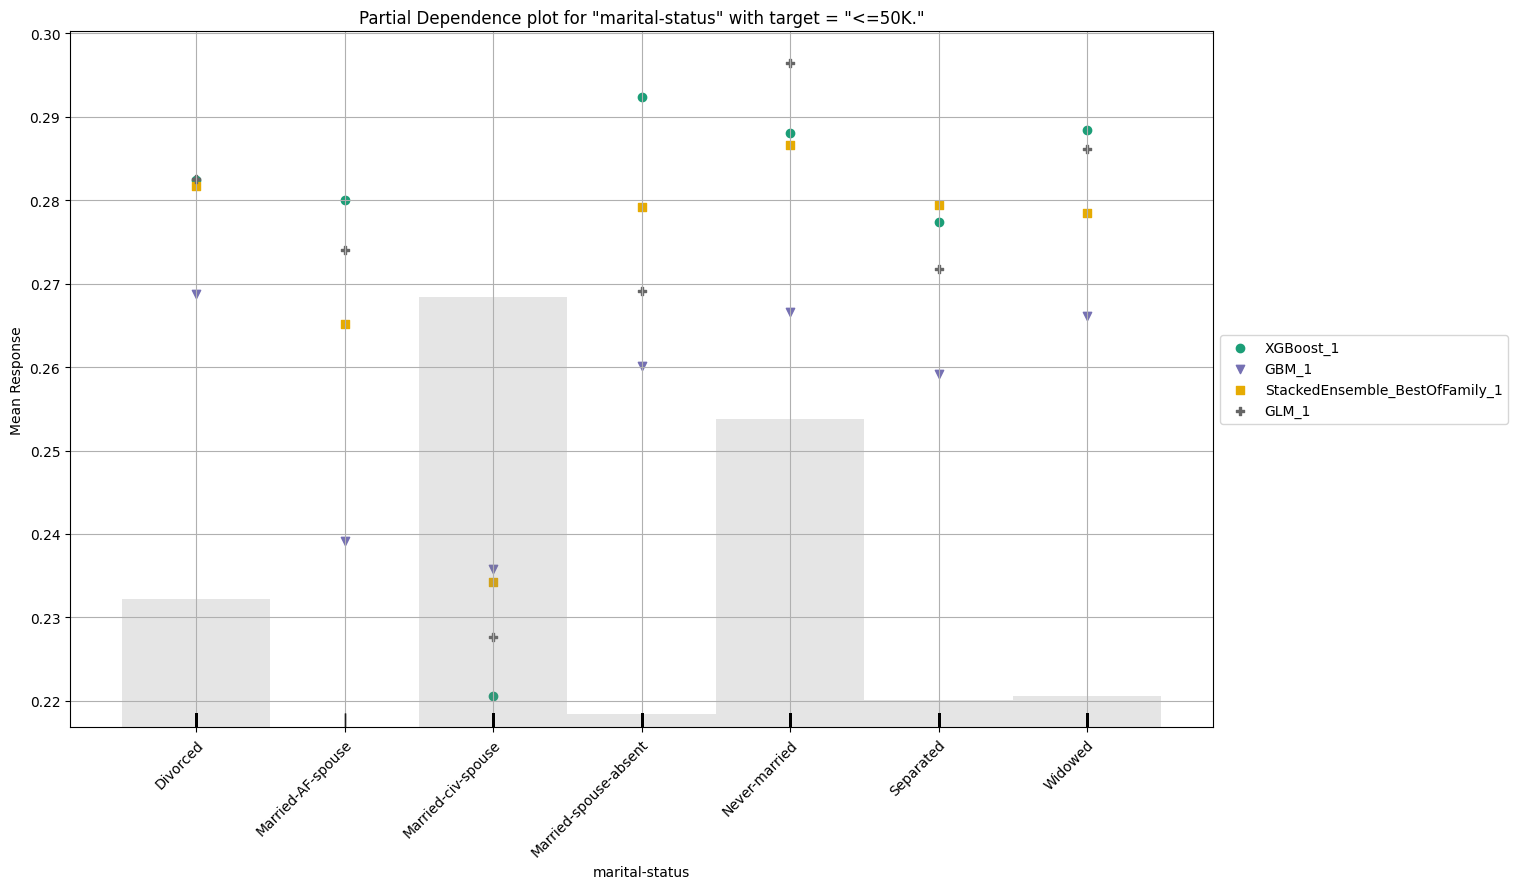

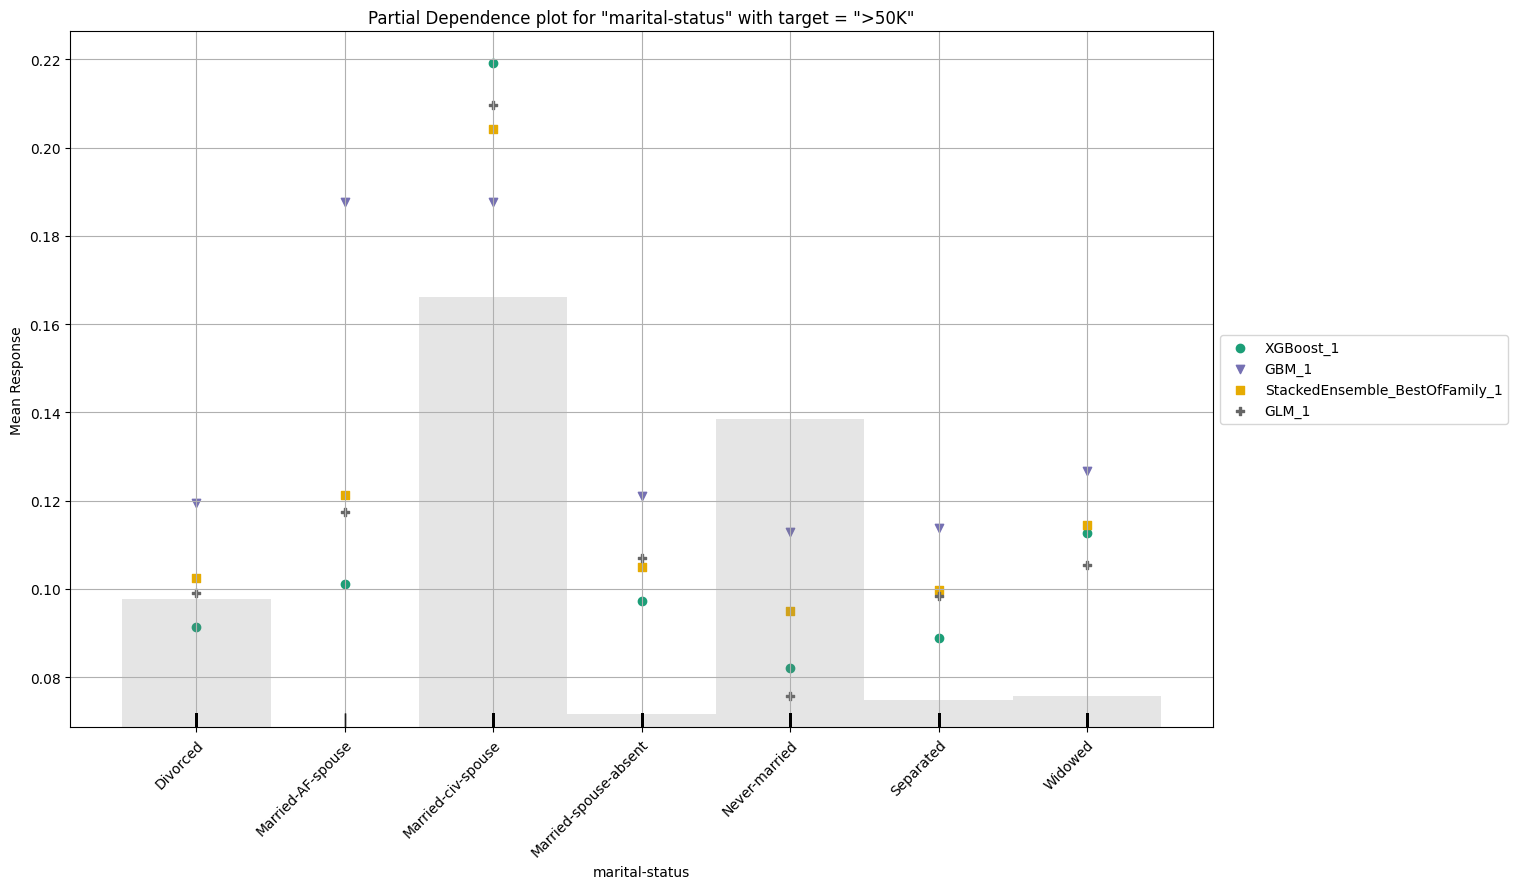

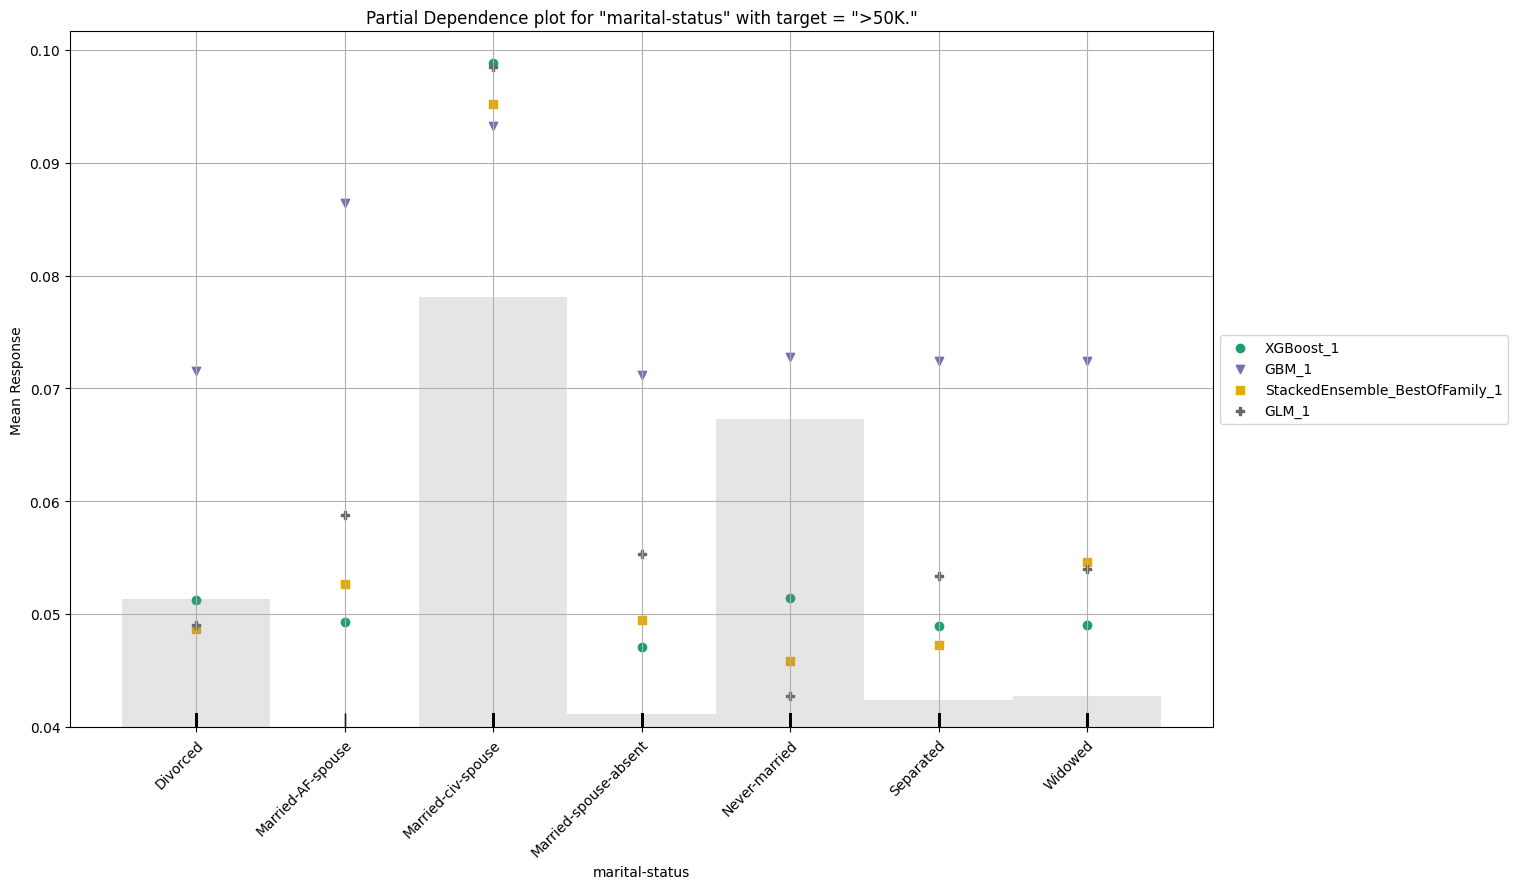

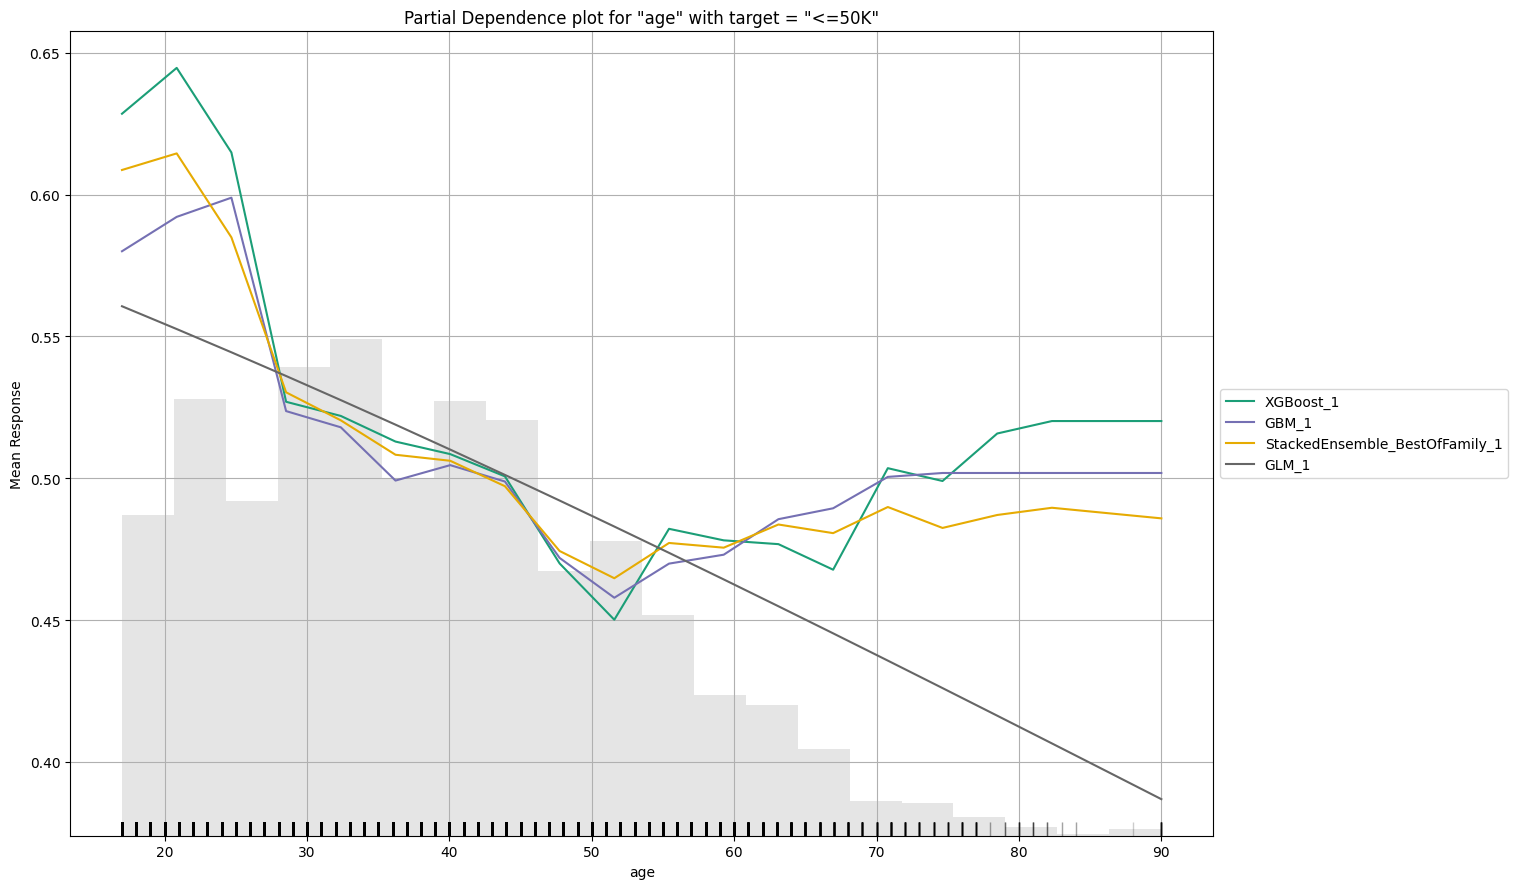

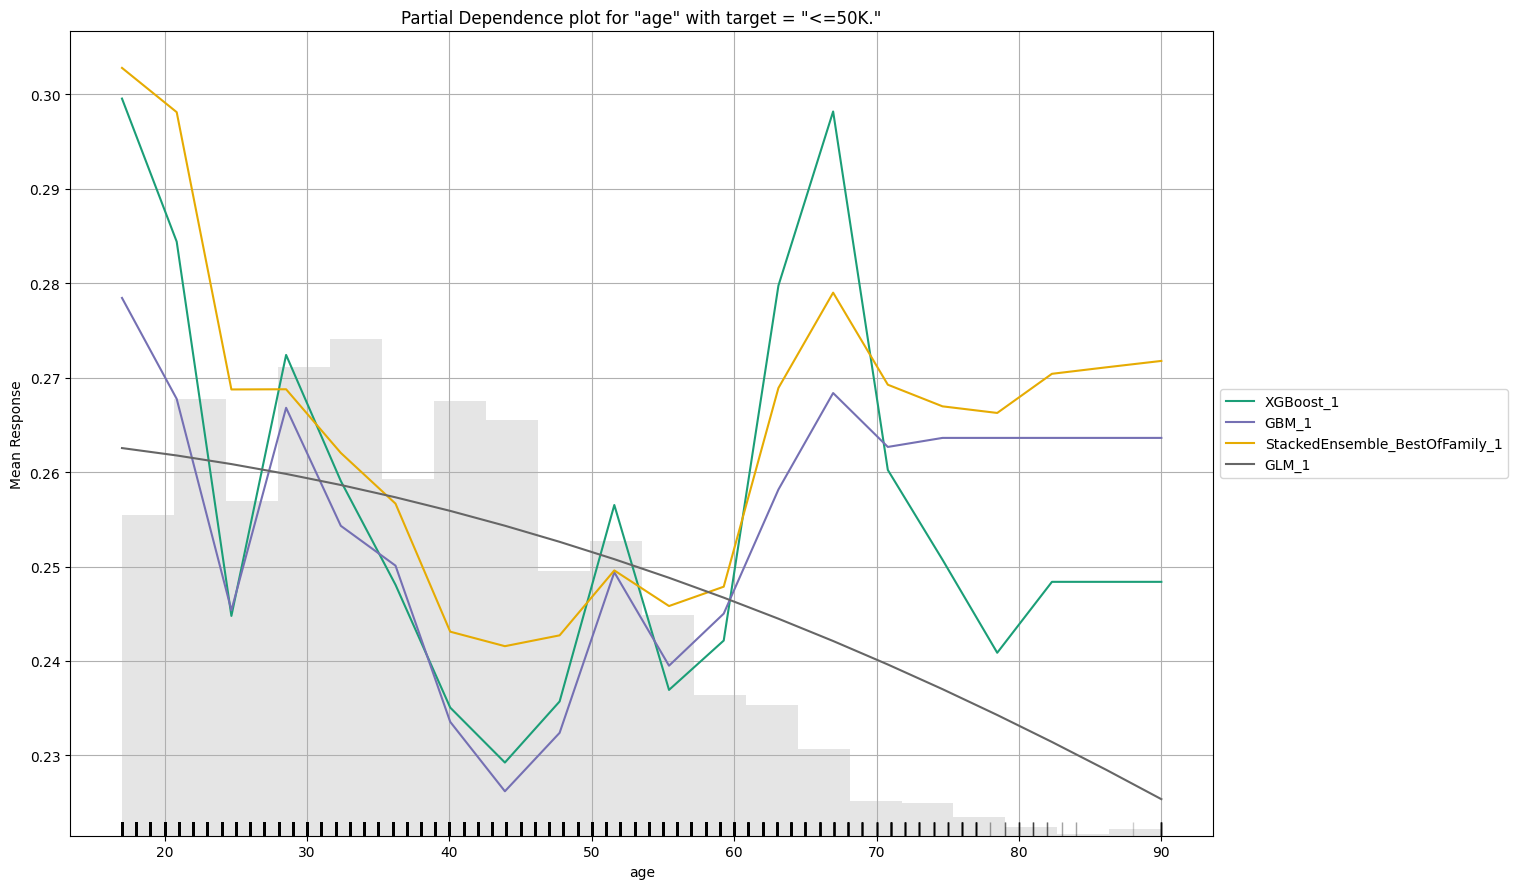

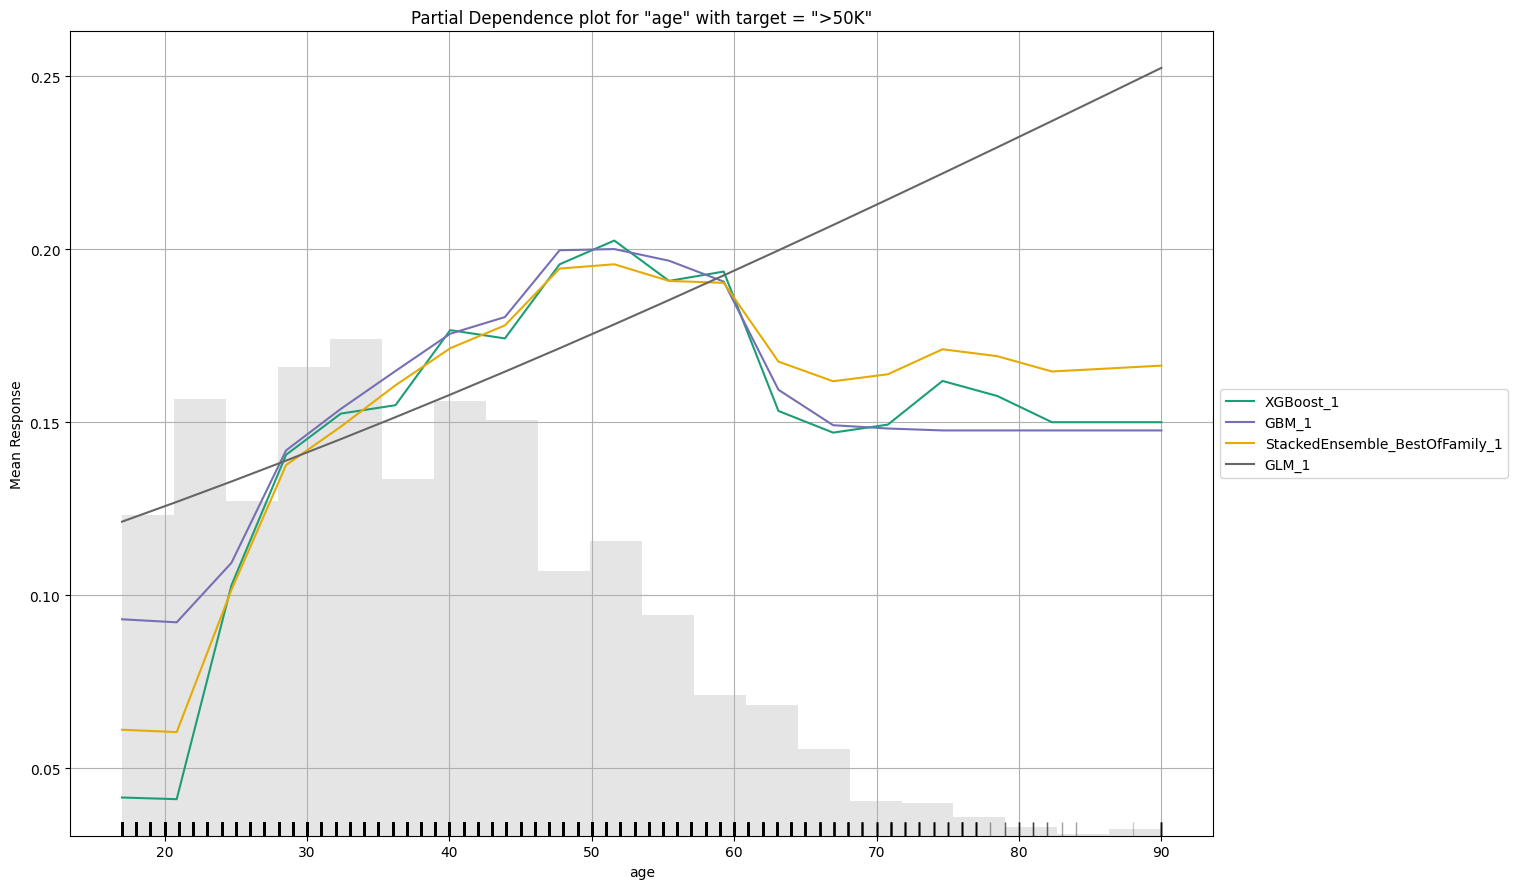

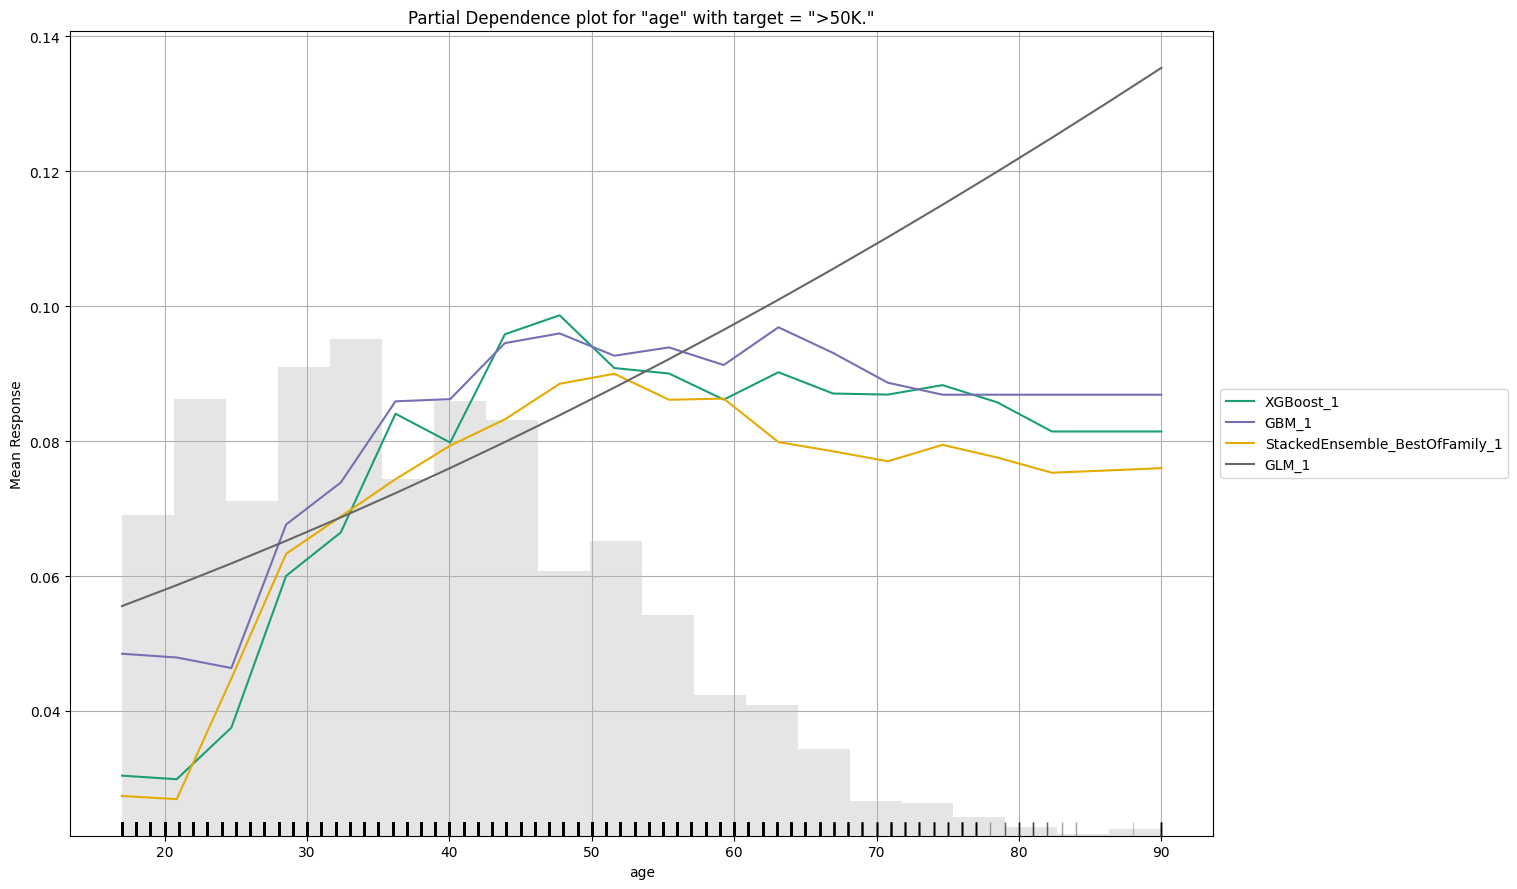

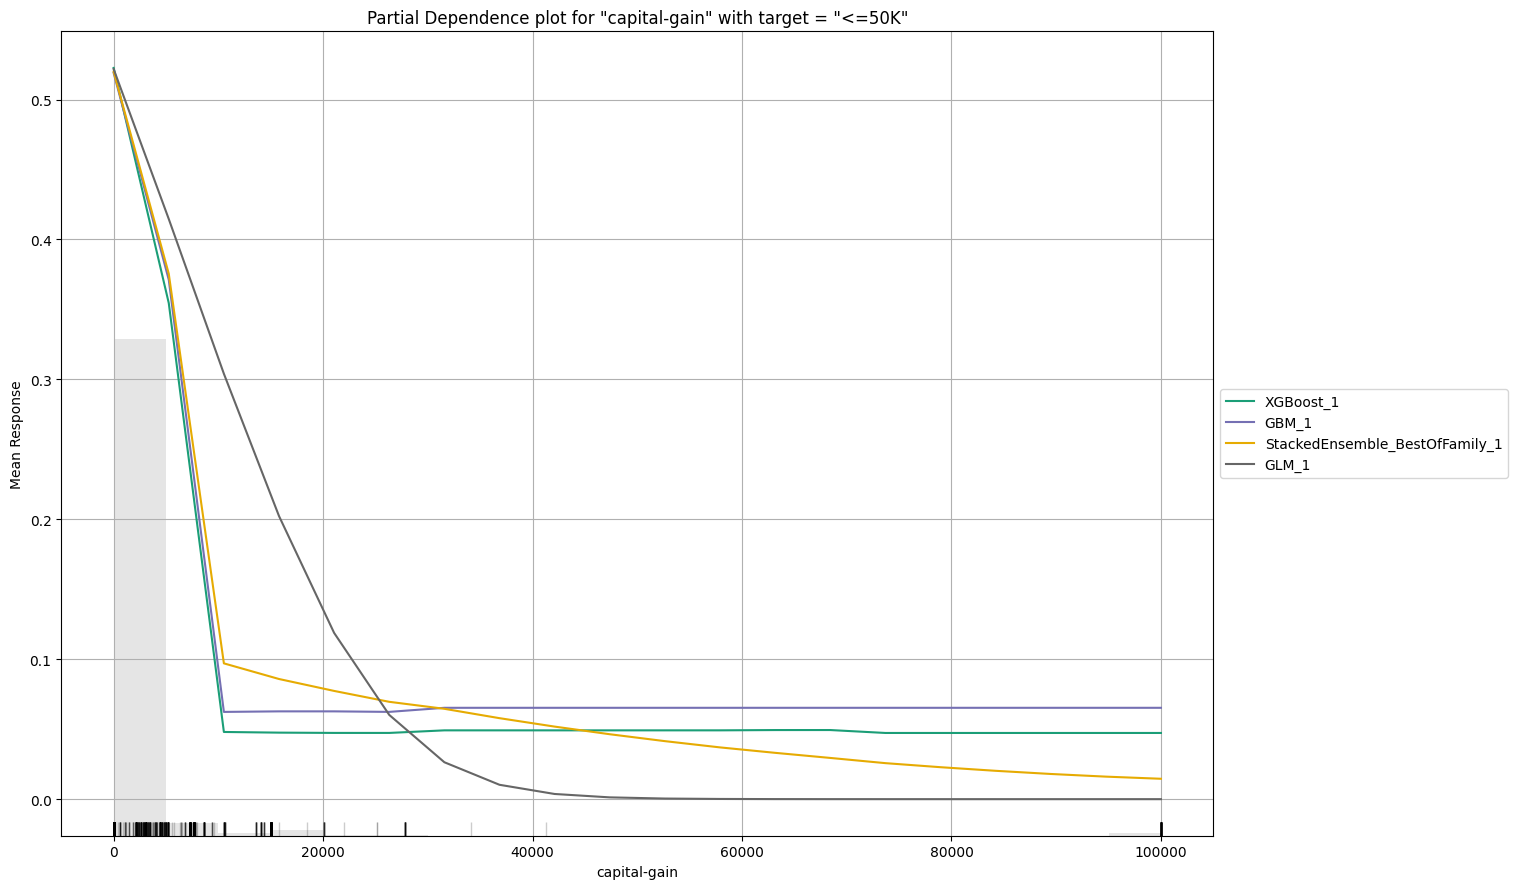

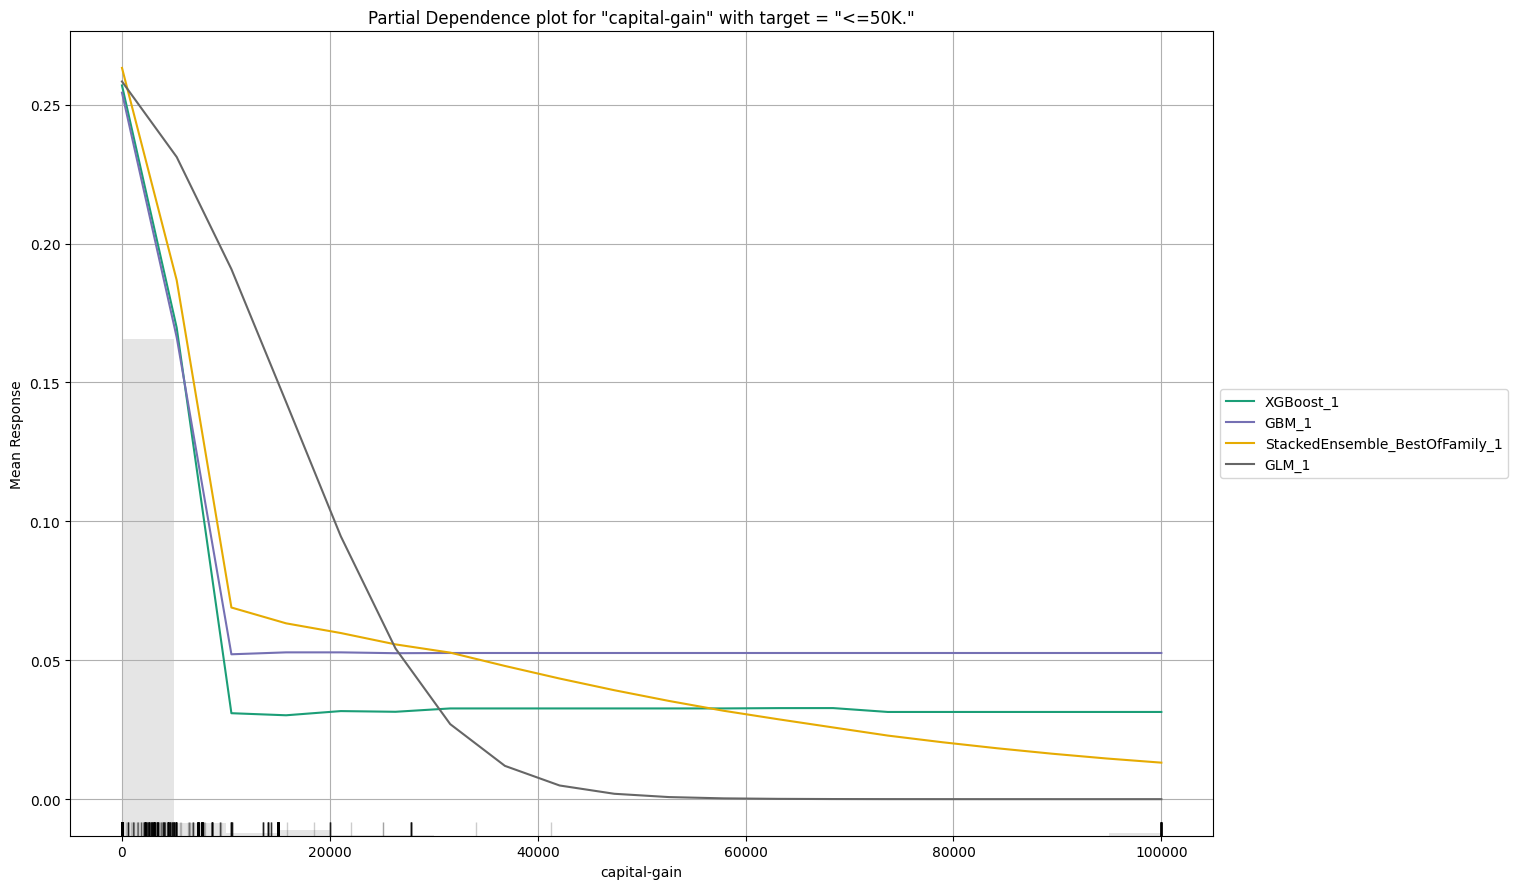

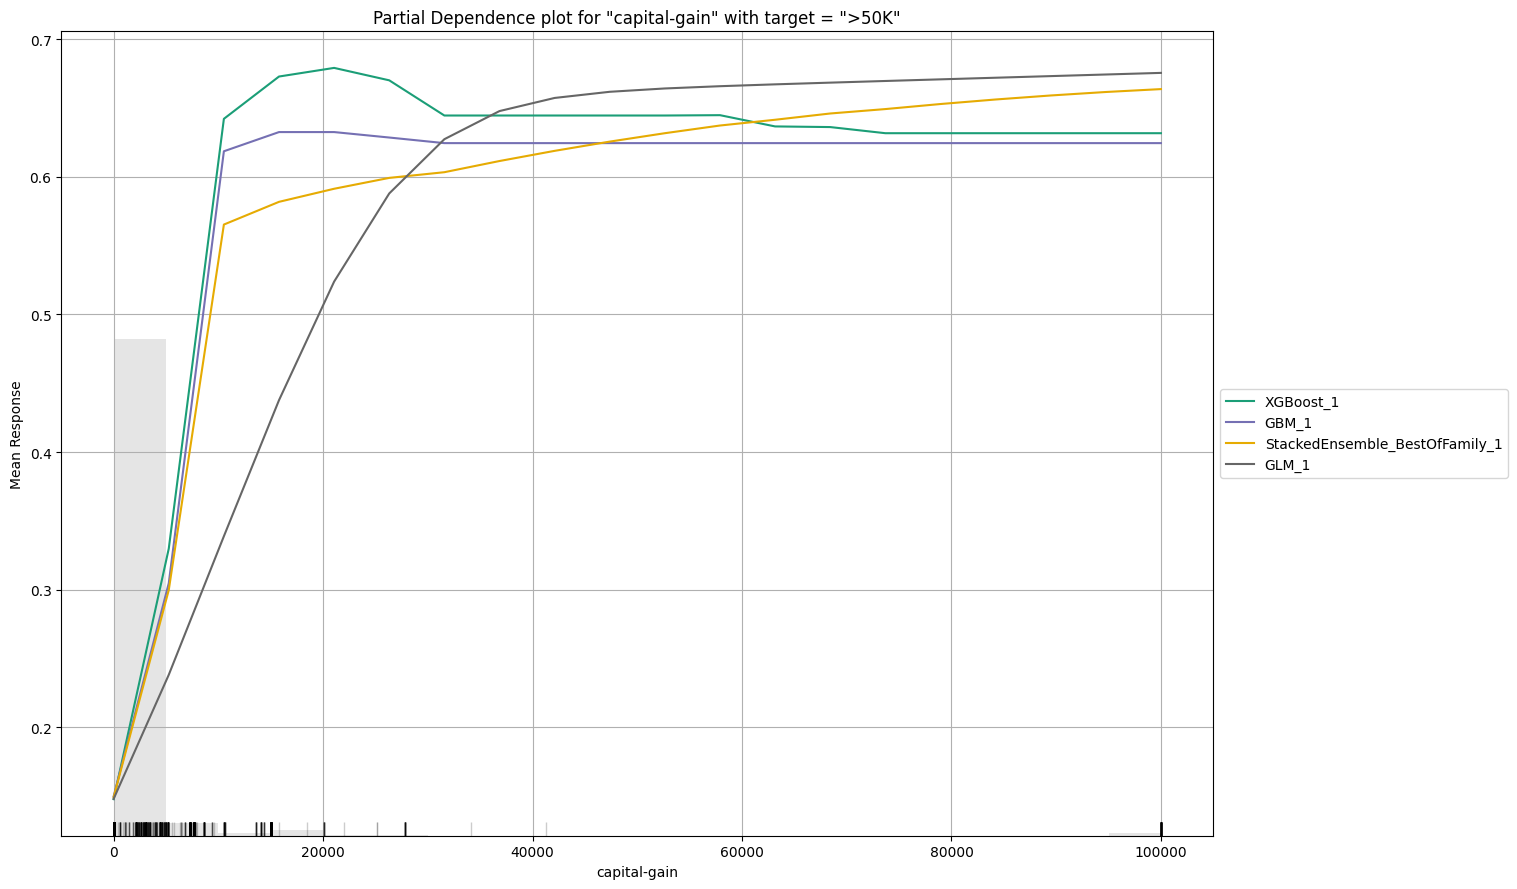

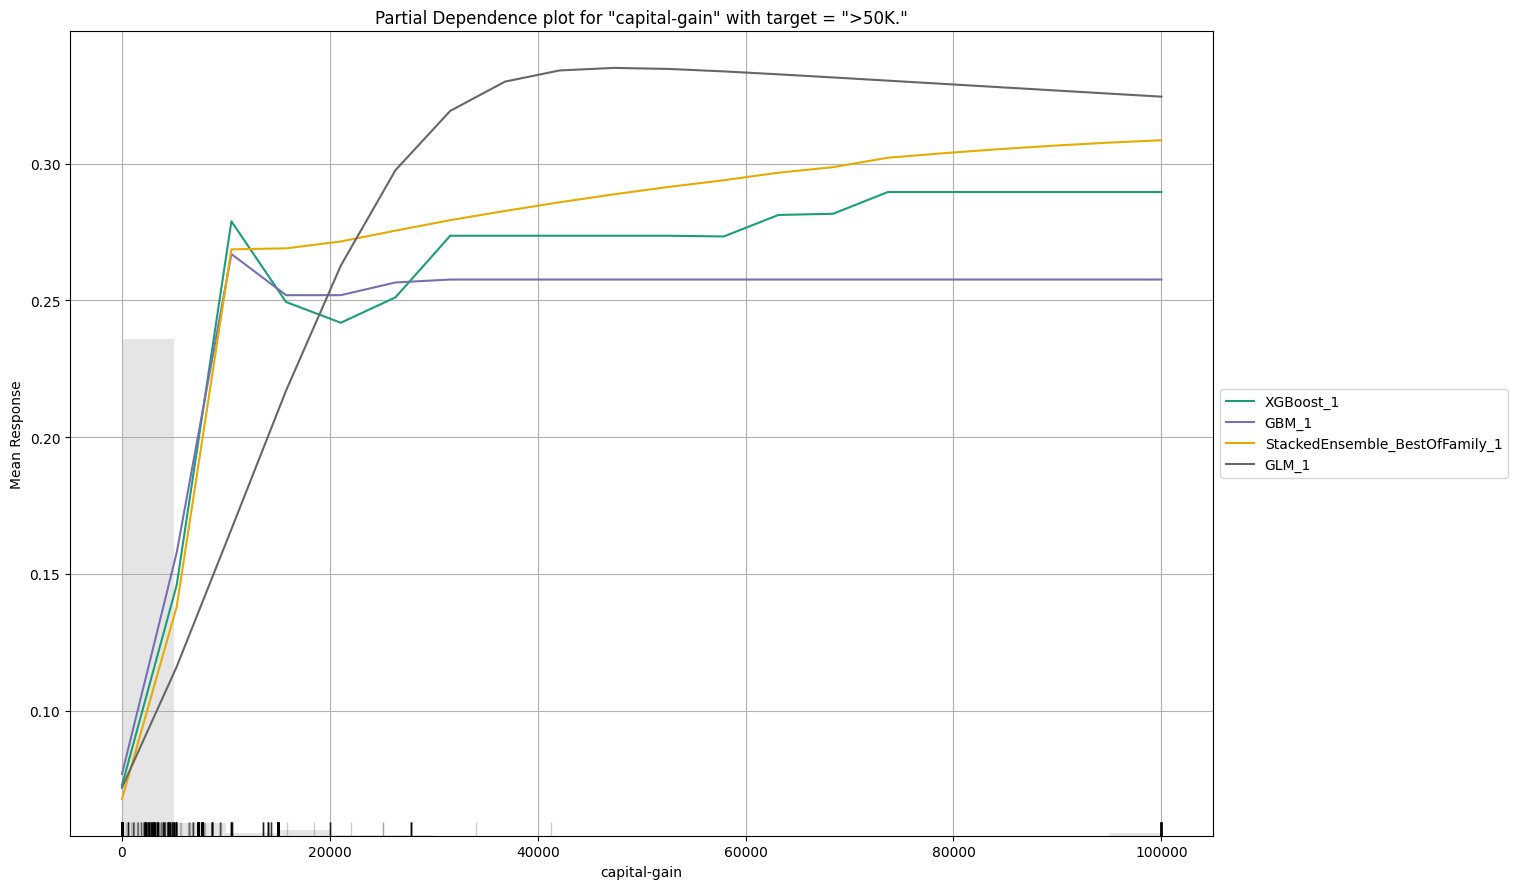

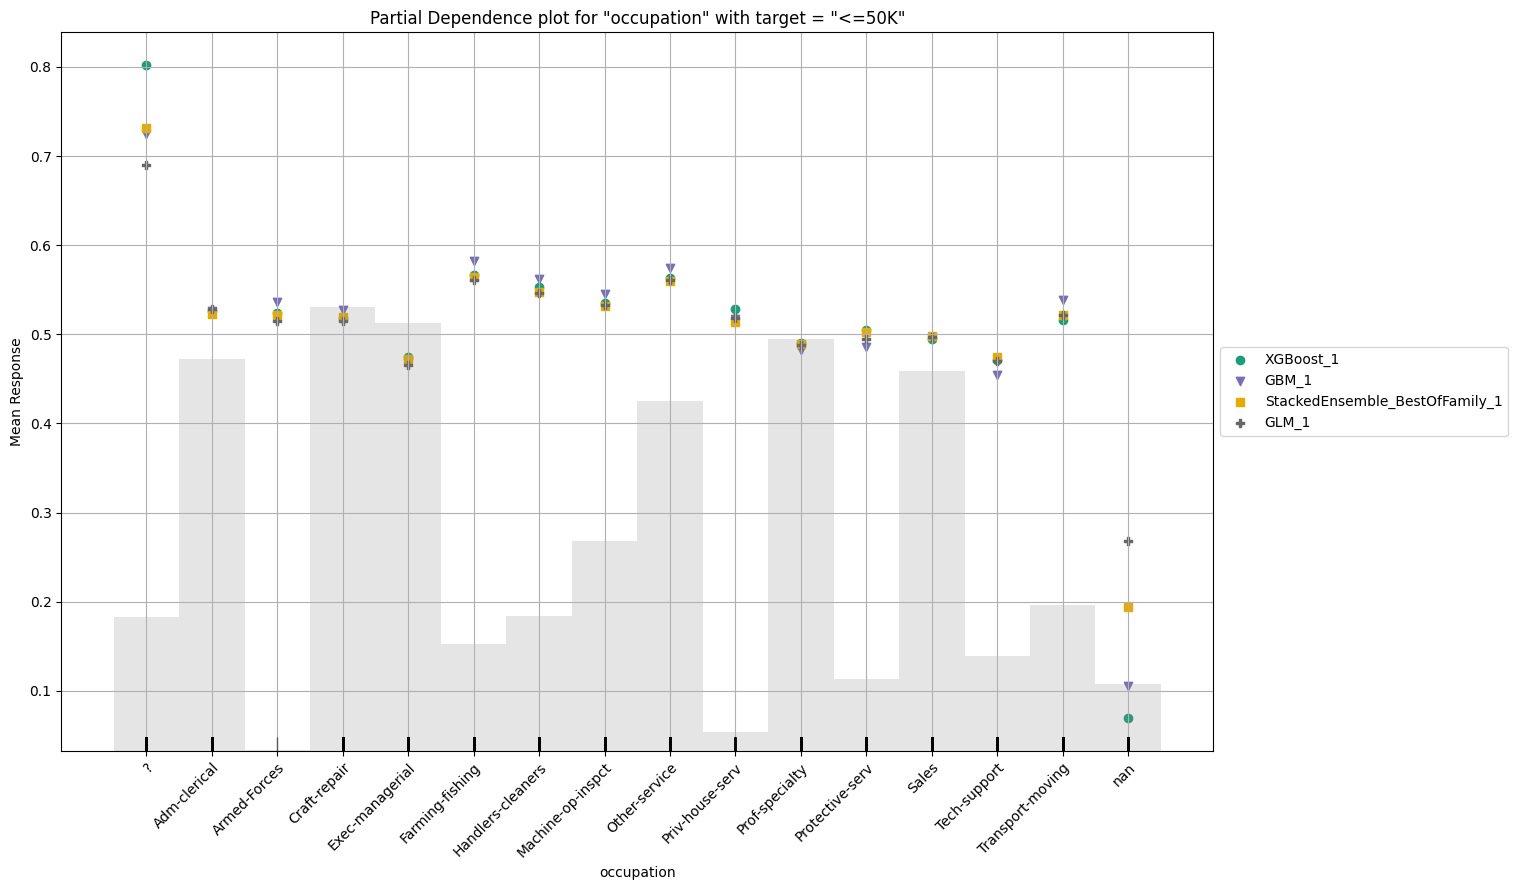

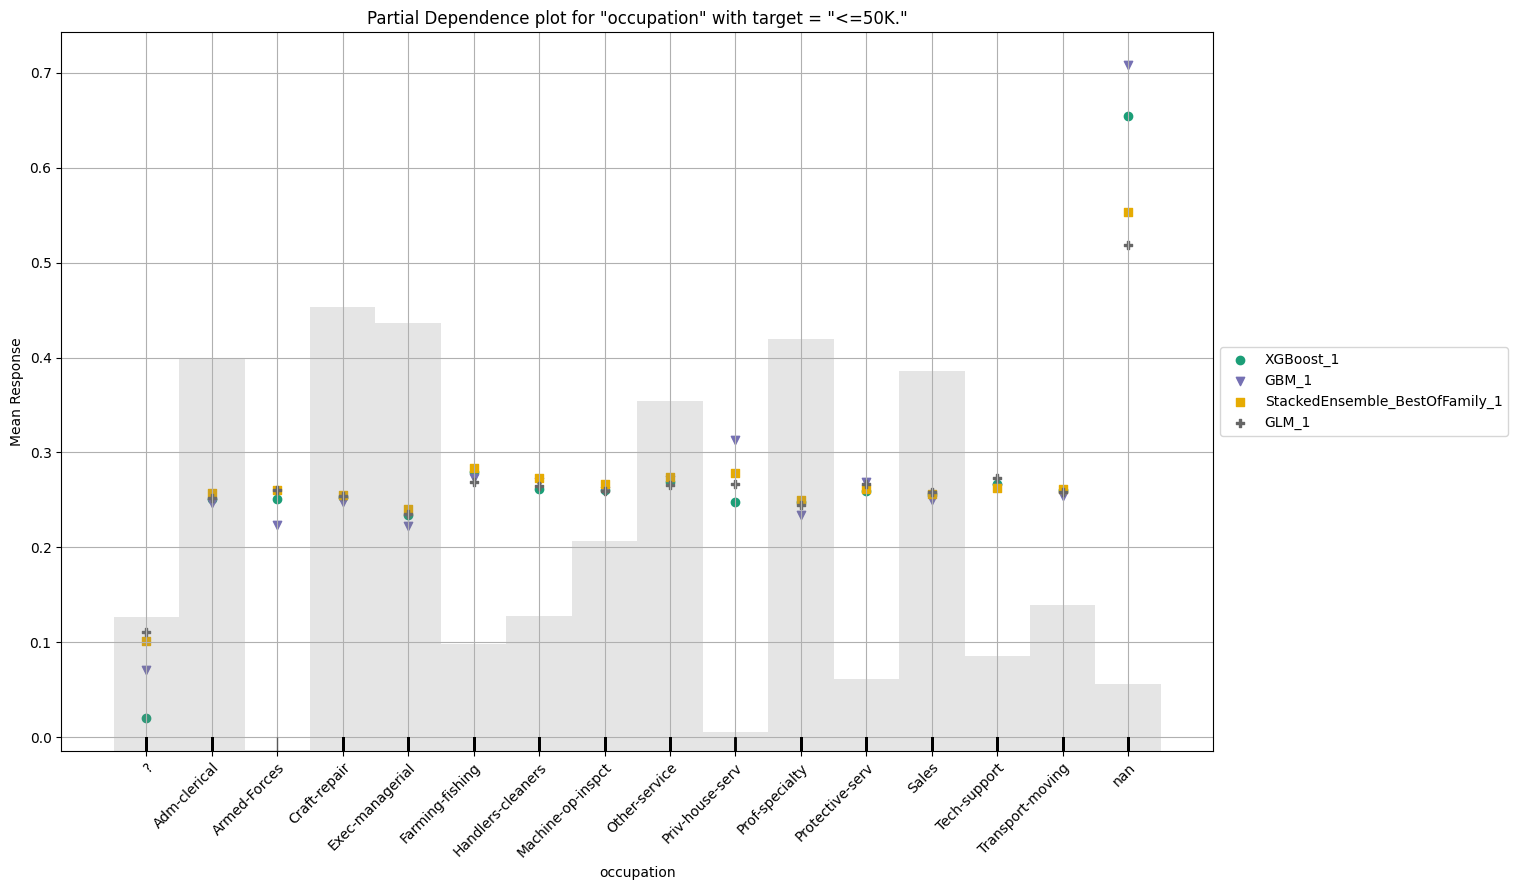

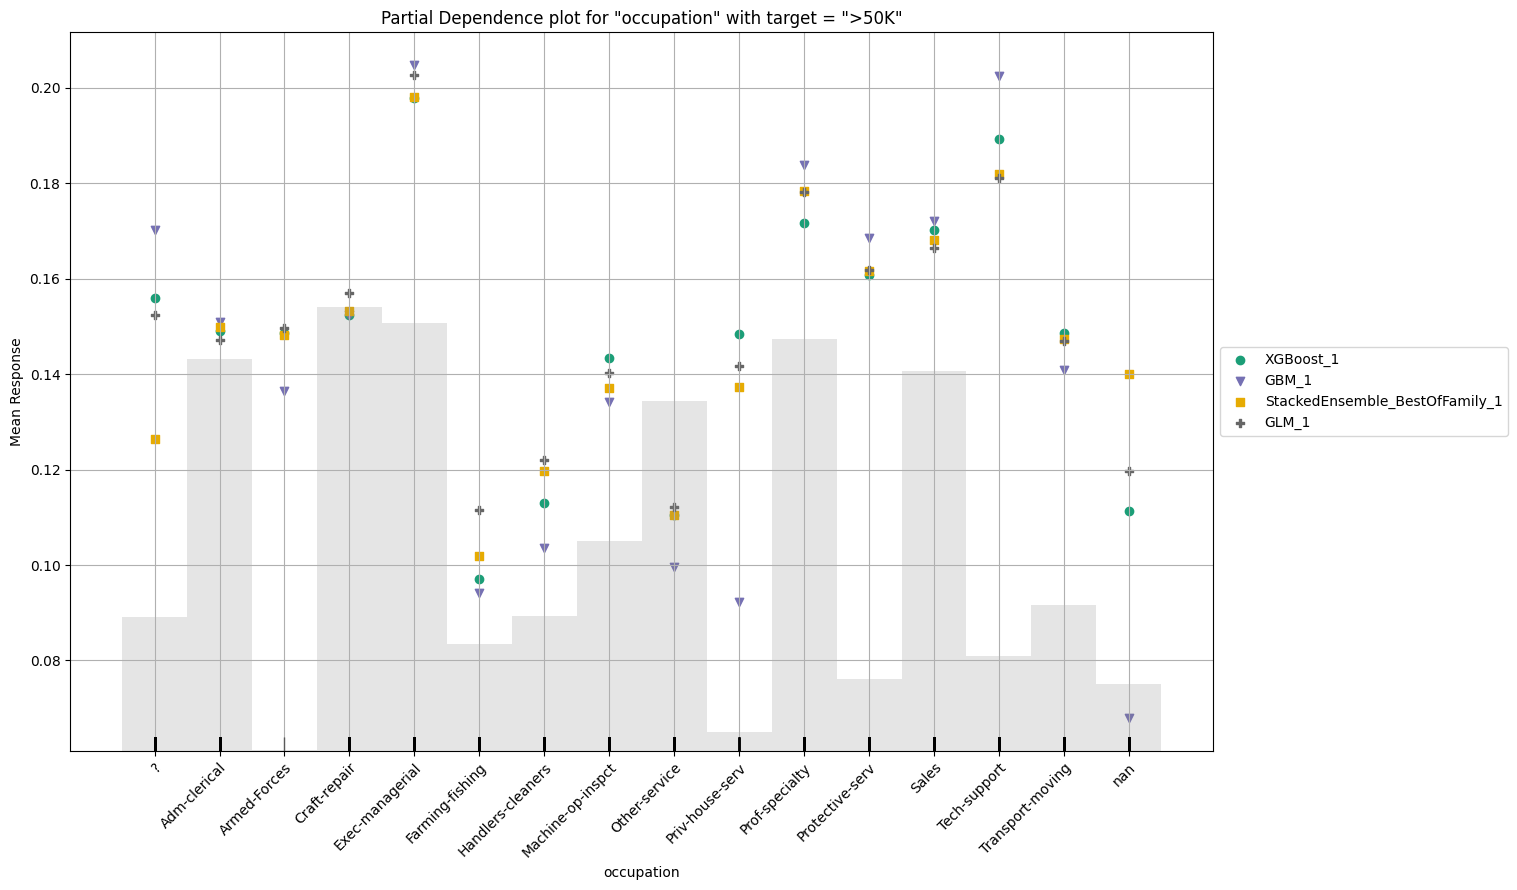

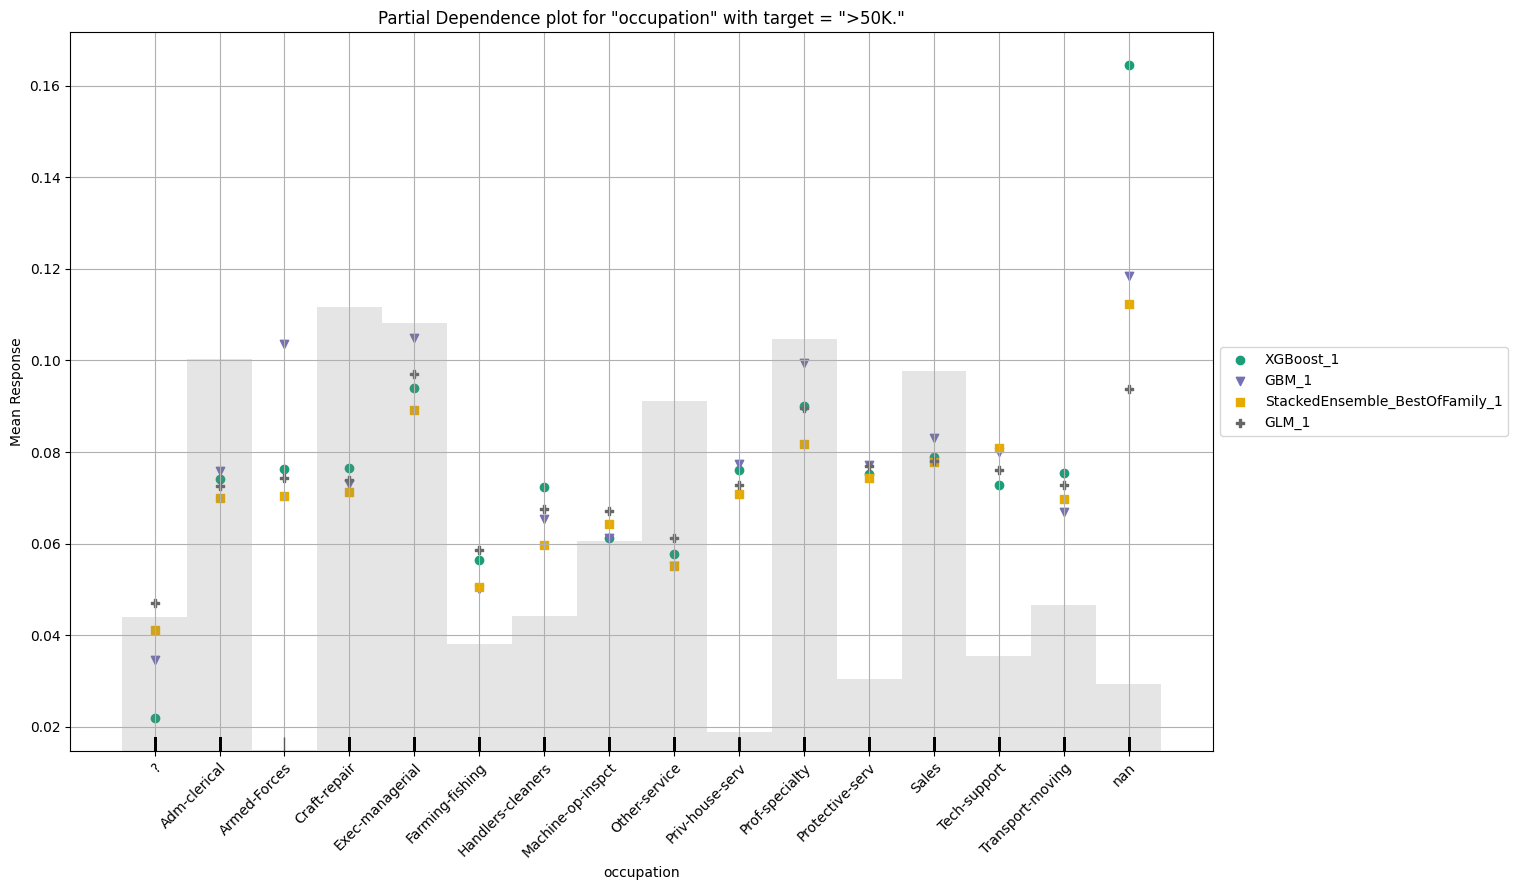

In [11]:
# Explain the model & compare with all AutoML models
exa = aml.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_1_20231008_162648

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
<=50K    <=50K.    >50K    >50K.    Error     Rate
-------  --------  ------  -------  --------  -------------
4293     309       303     31       0.130267  643 / 4,936
1926     384       147     21       0.845036  2,094 / 2,478
503      45        910     104      0.417414  652 / 1,562
244      35        442     72       0.909206  721 / 793
6966     773       1802    228      0.420719  4,110 / 9,769

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

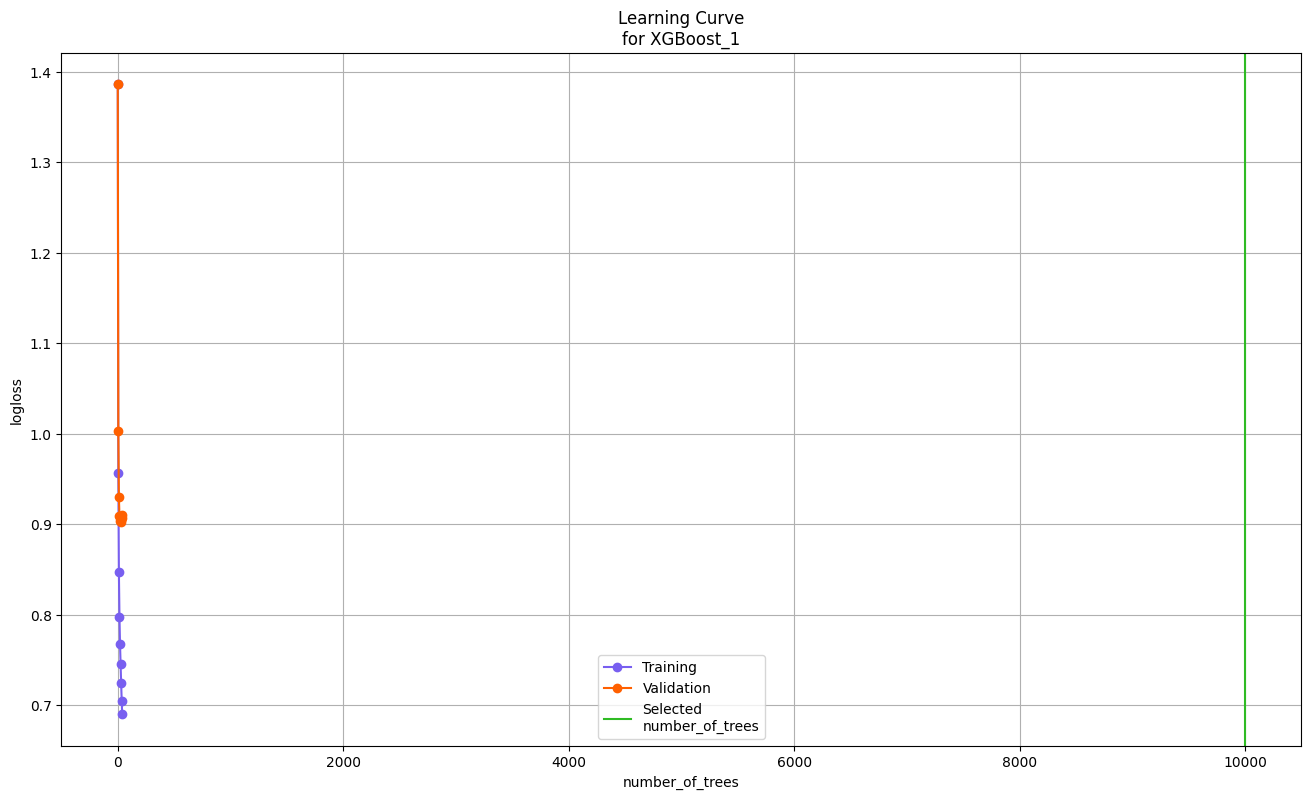

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

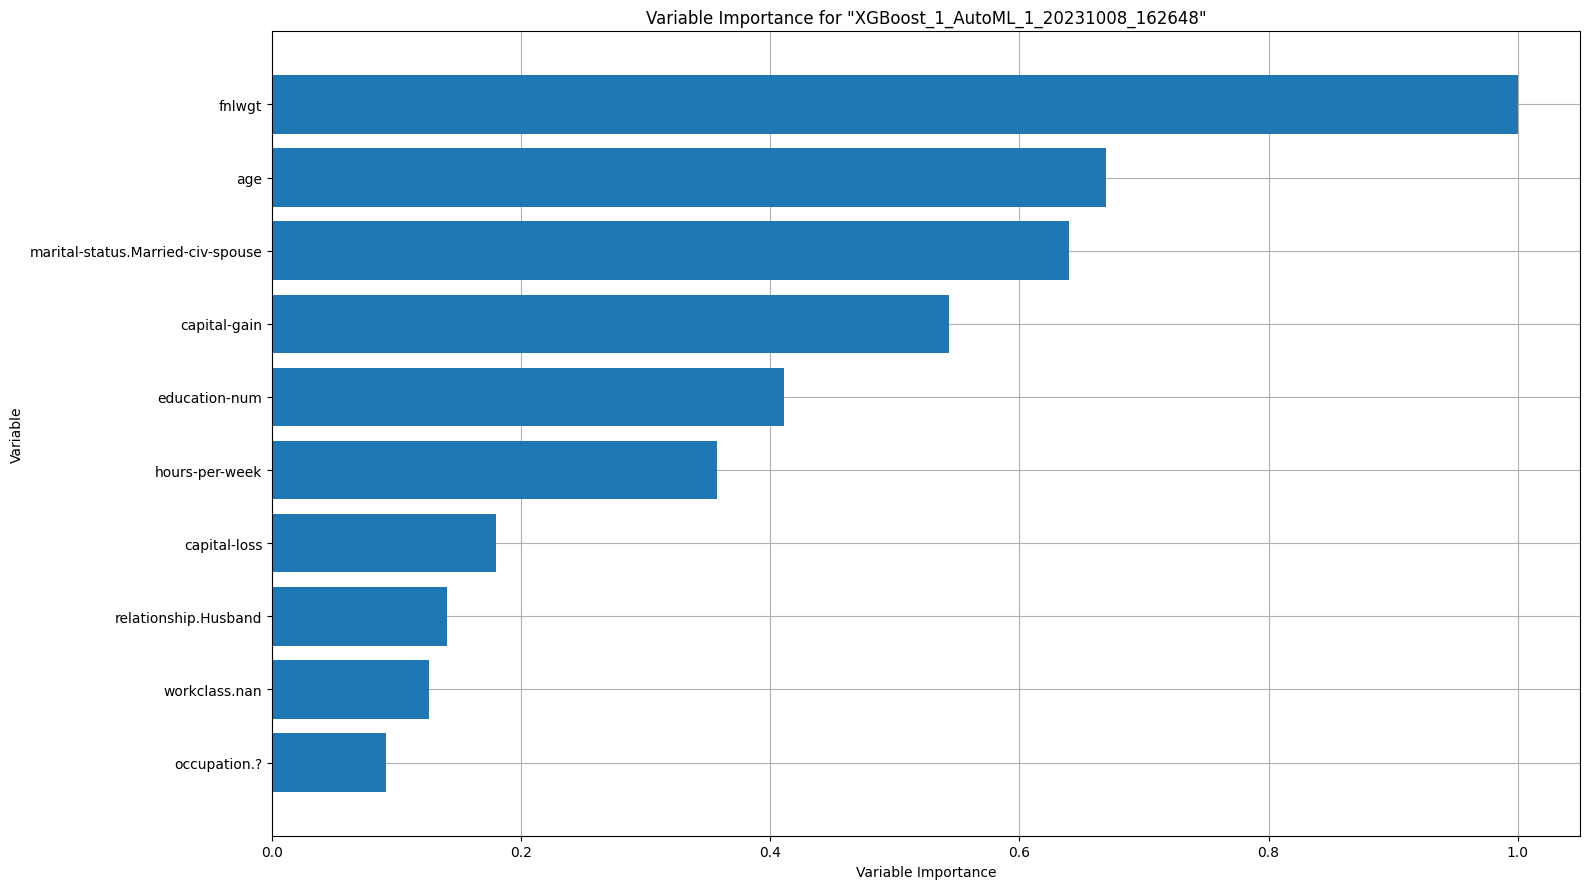

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

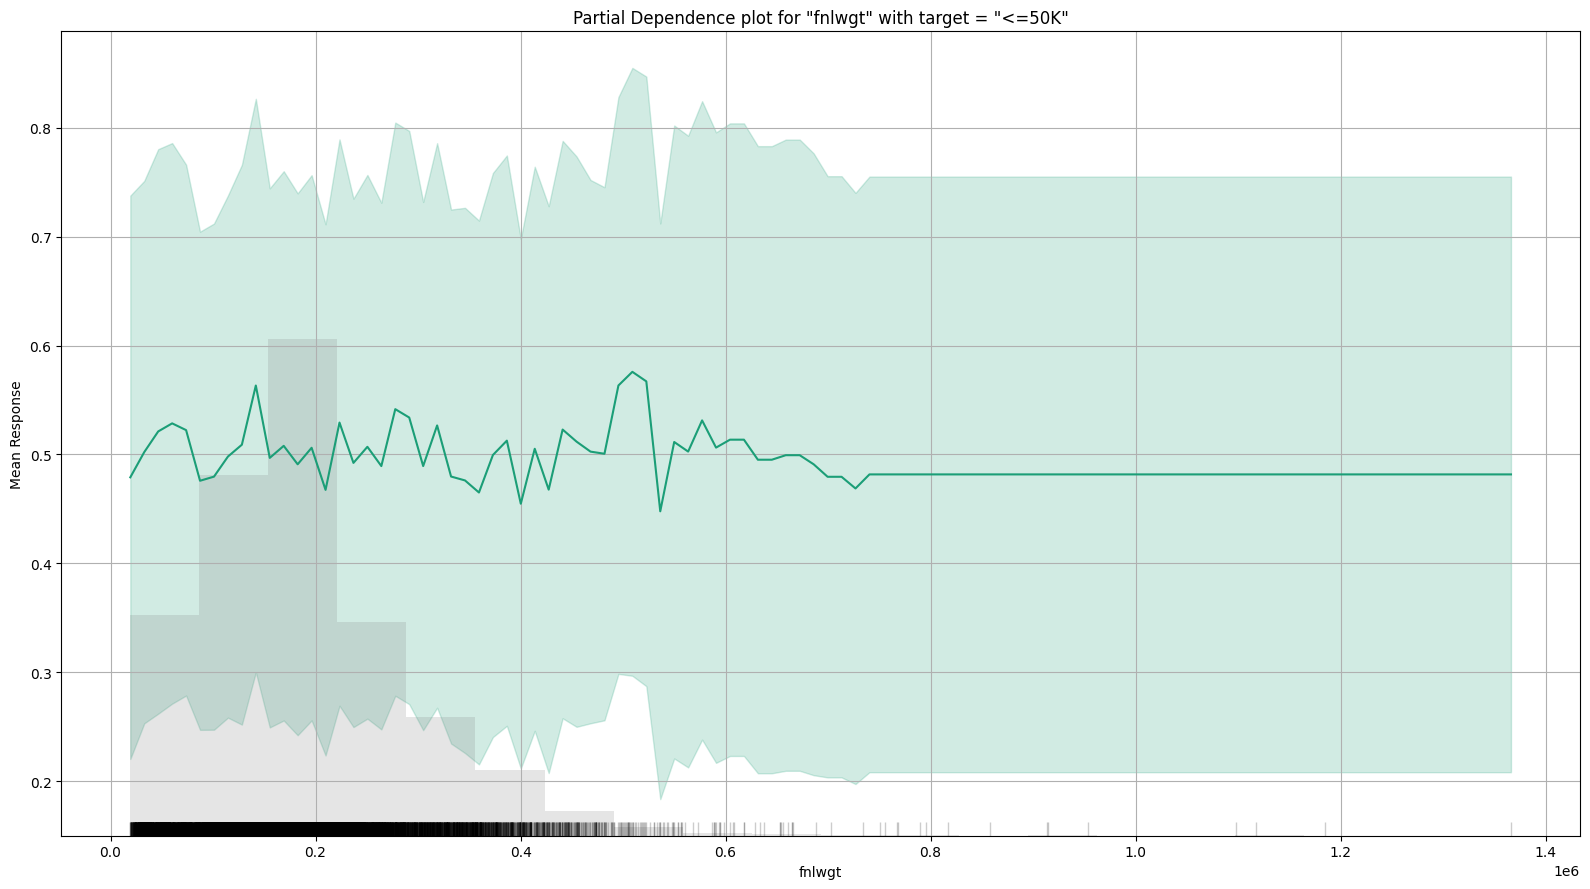

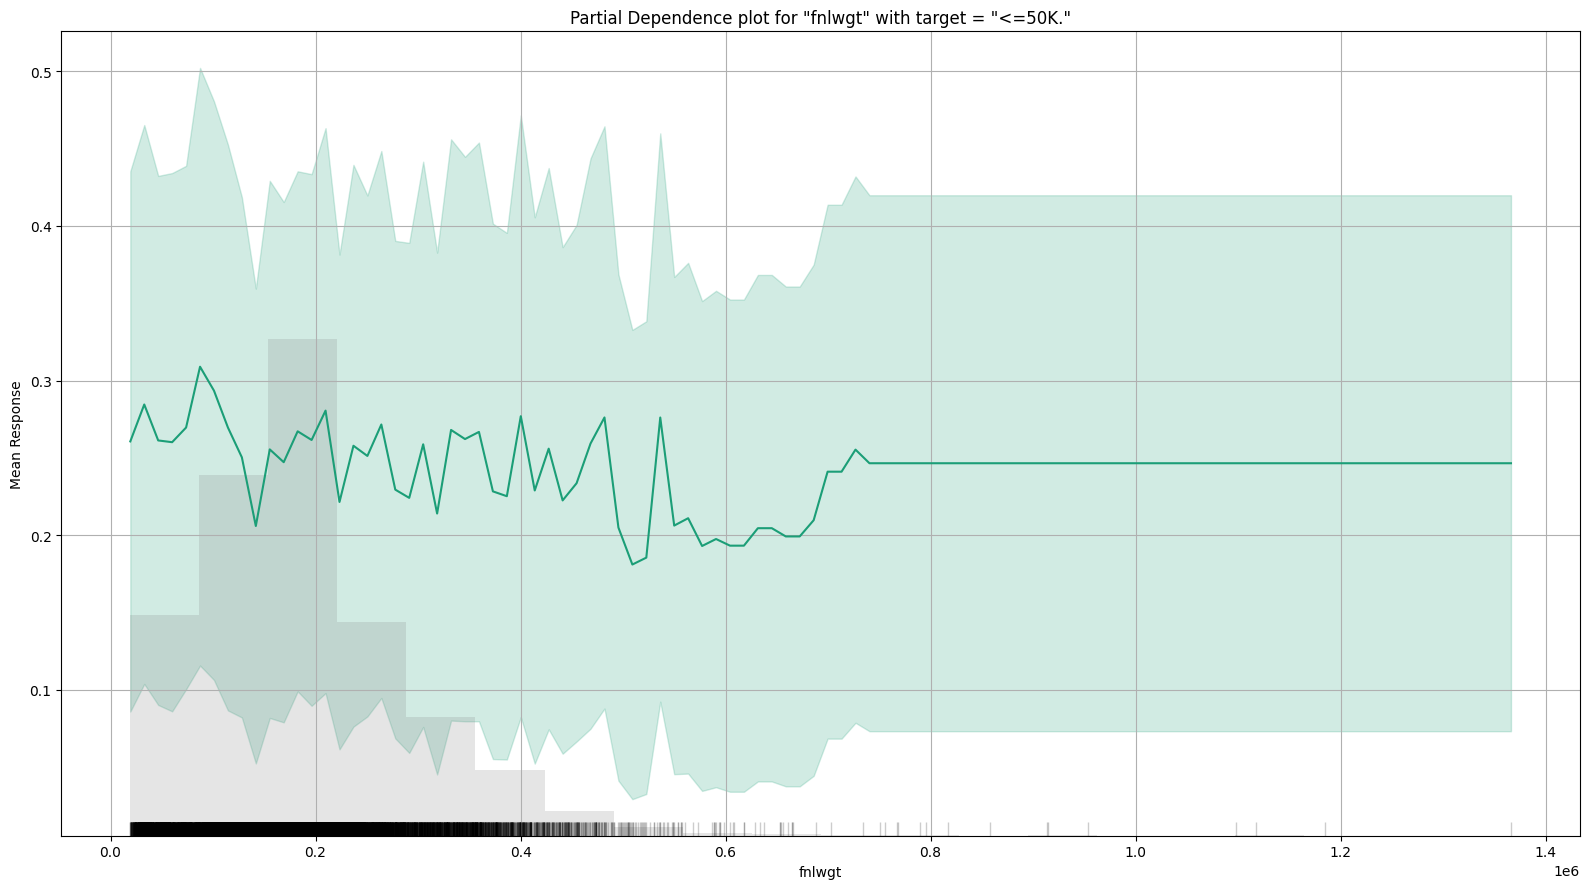

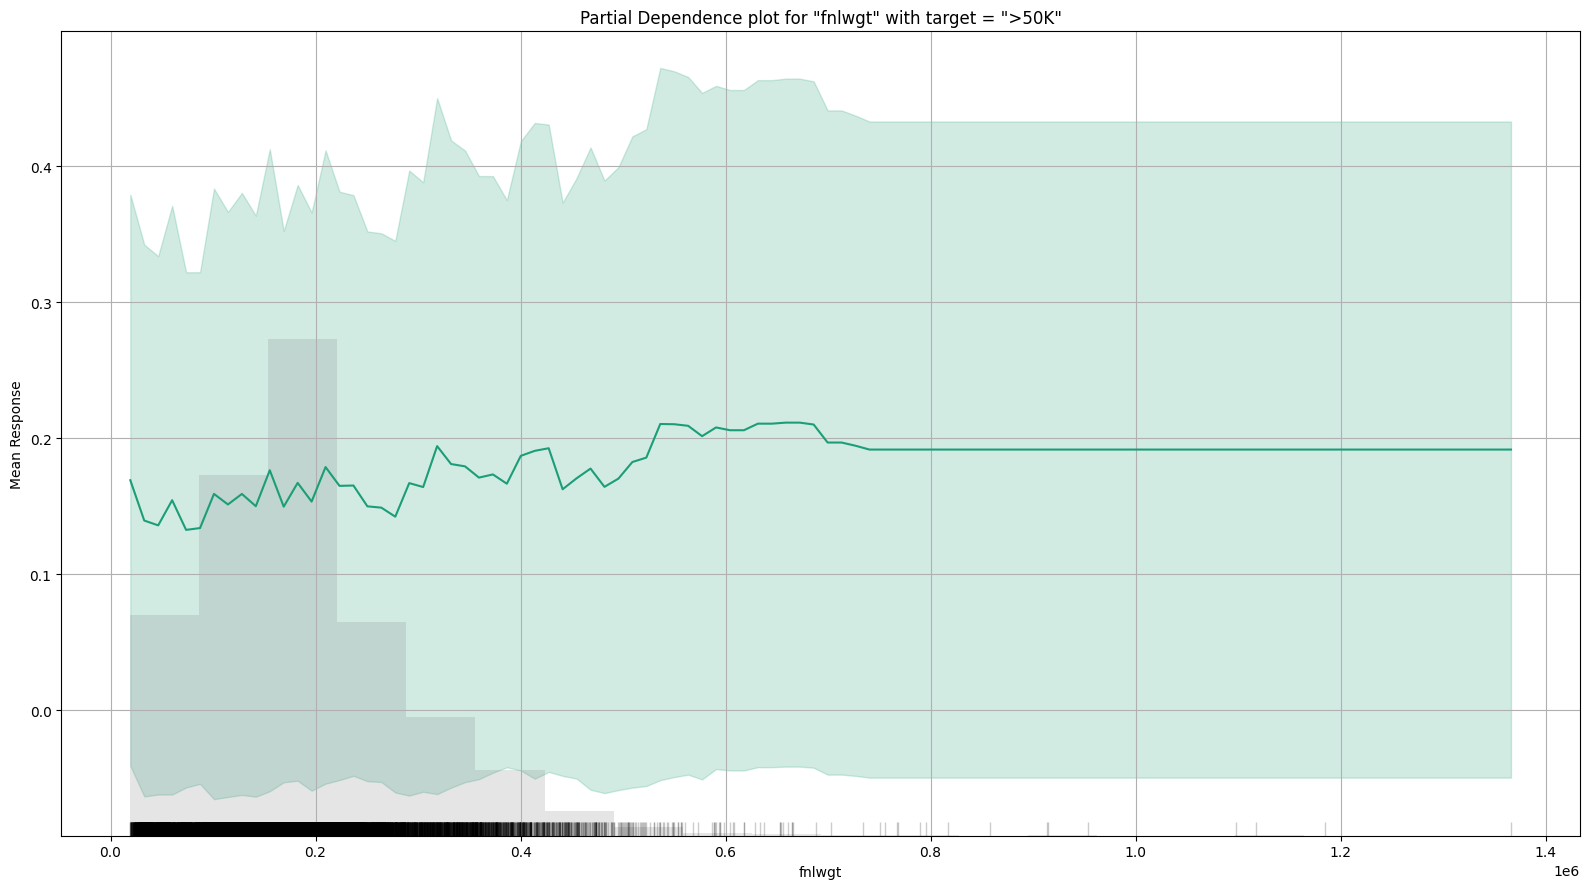

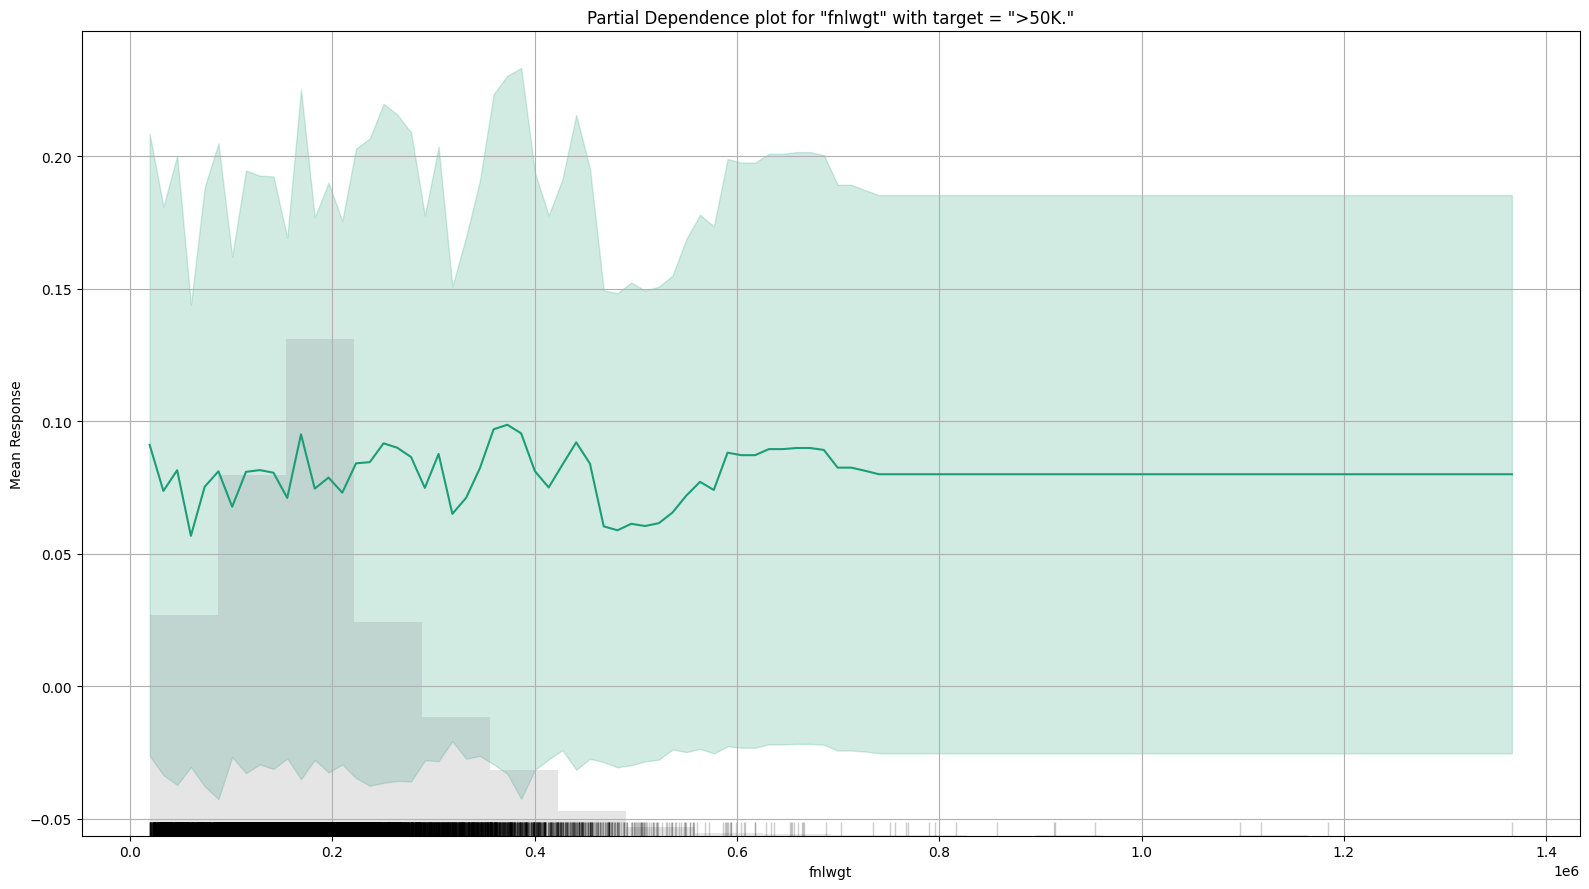

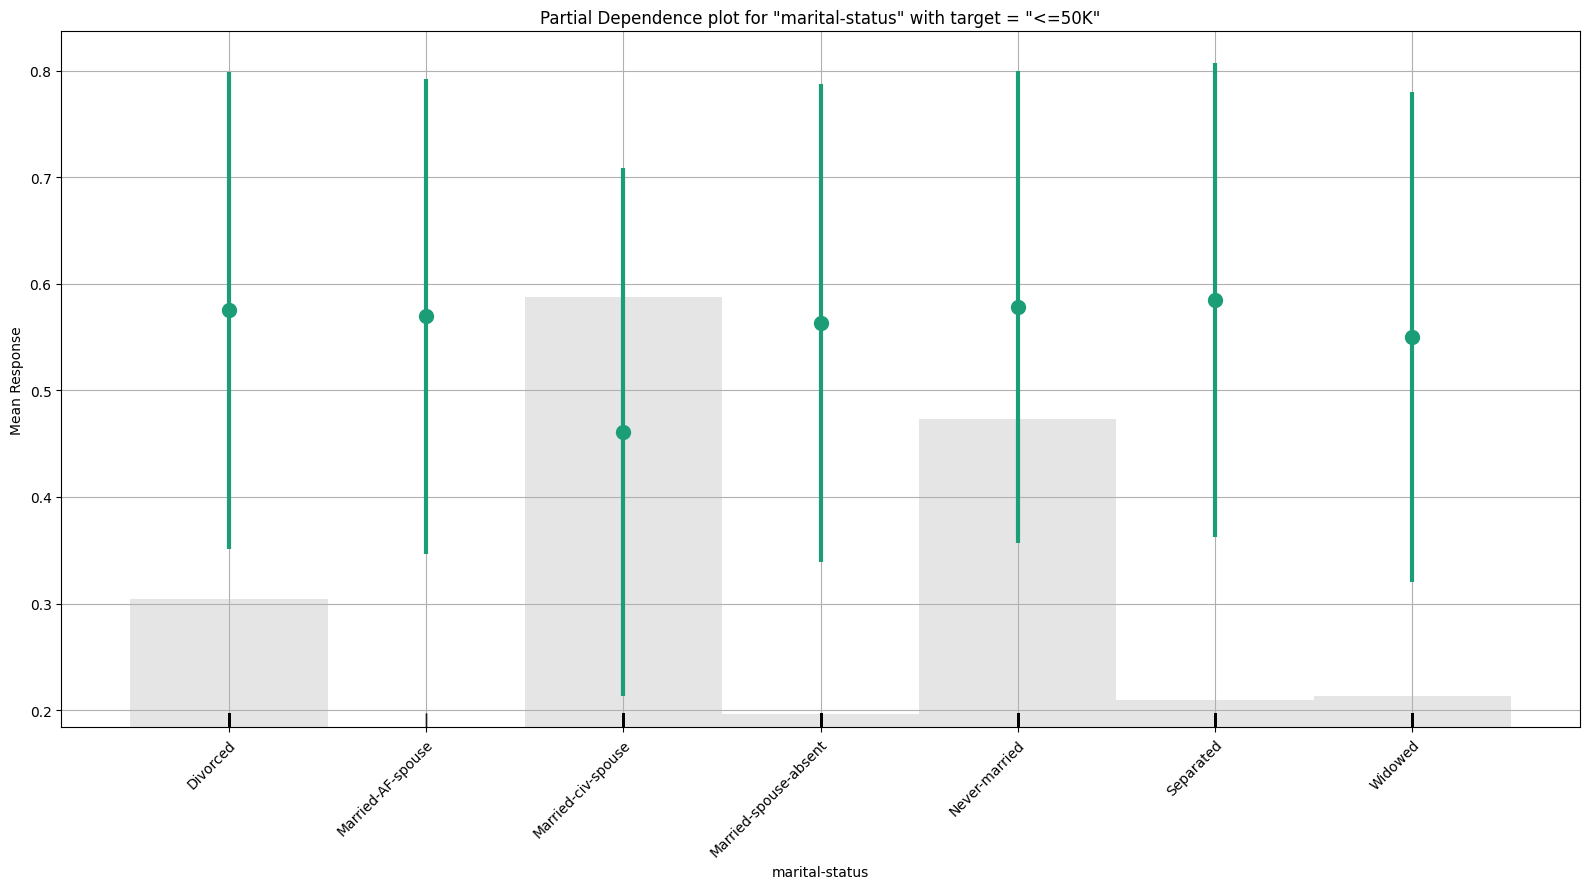

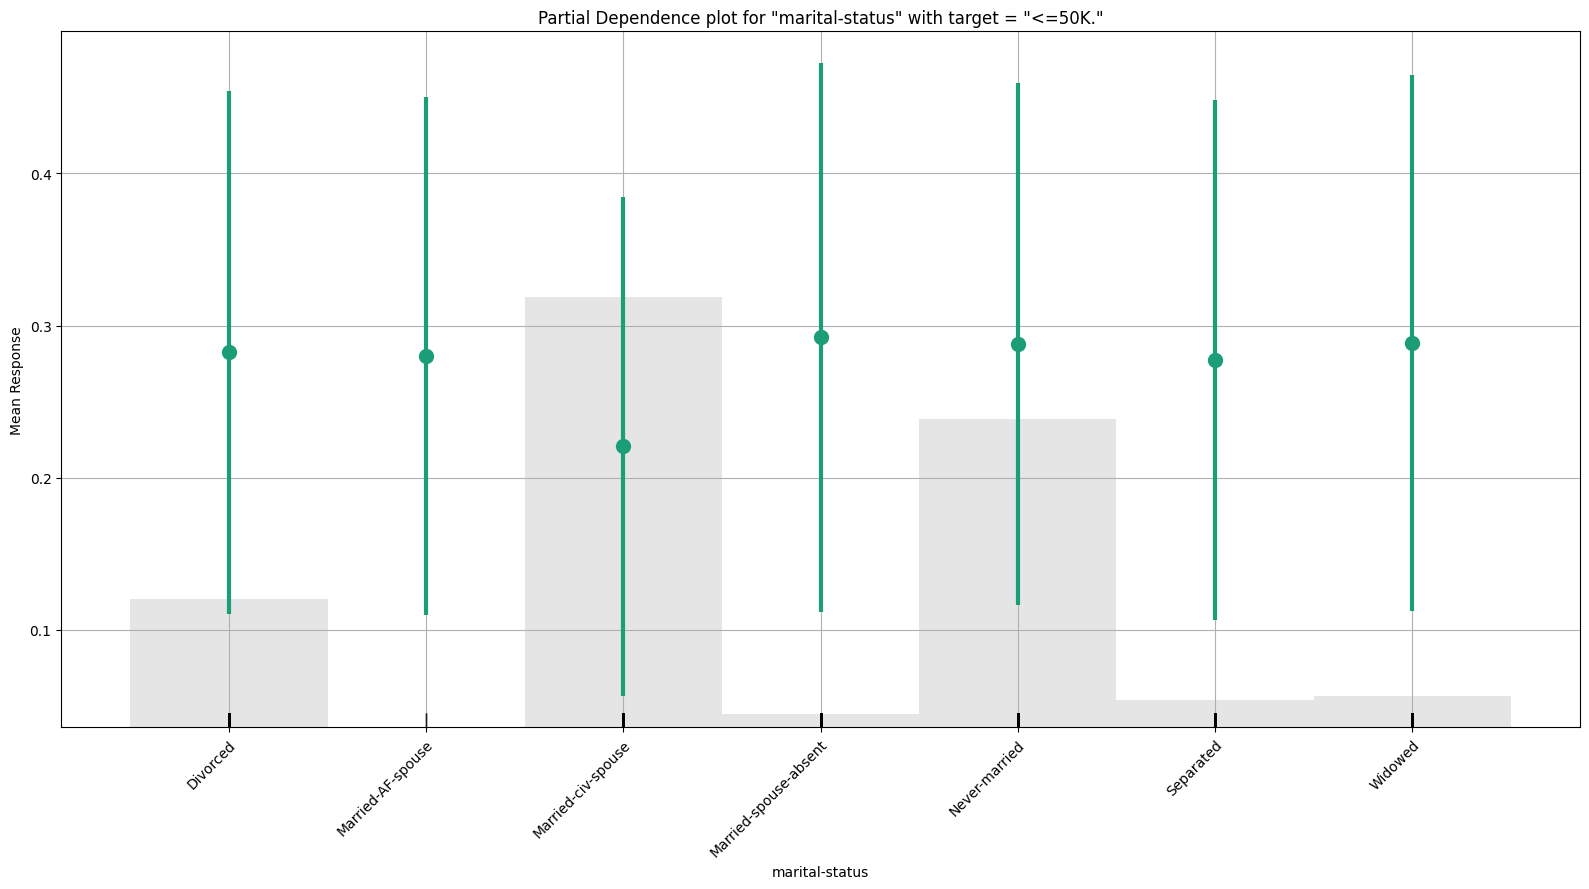

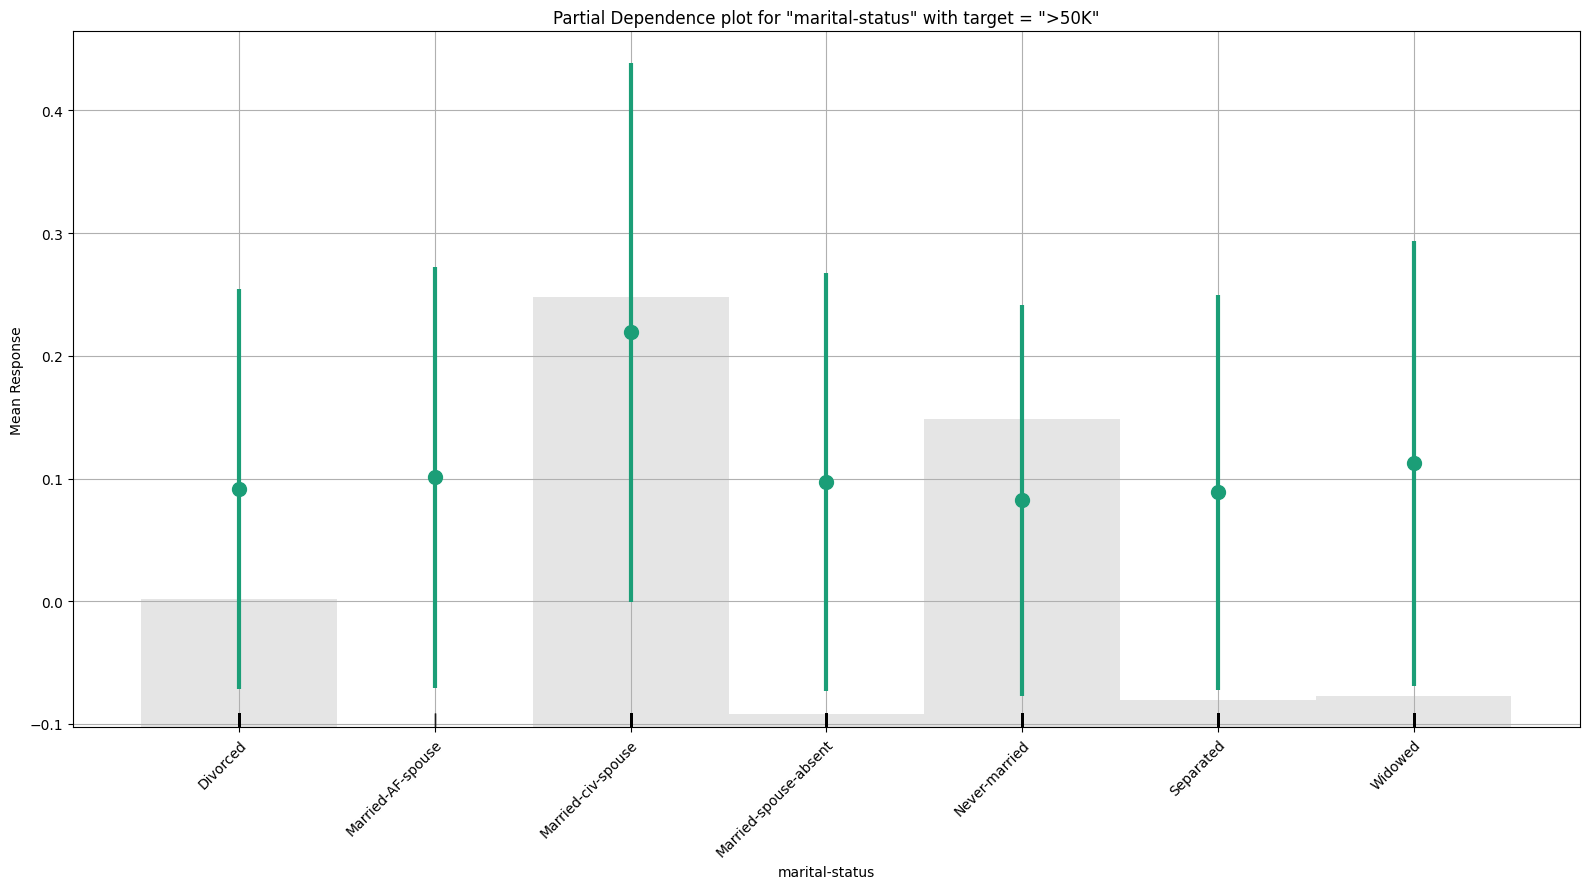

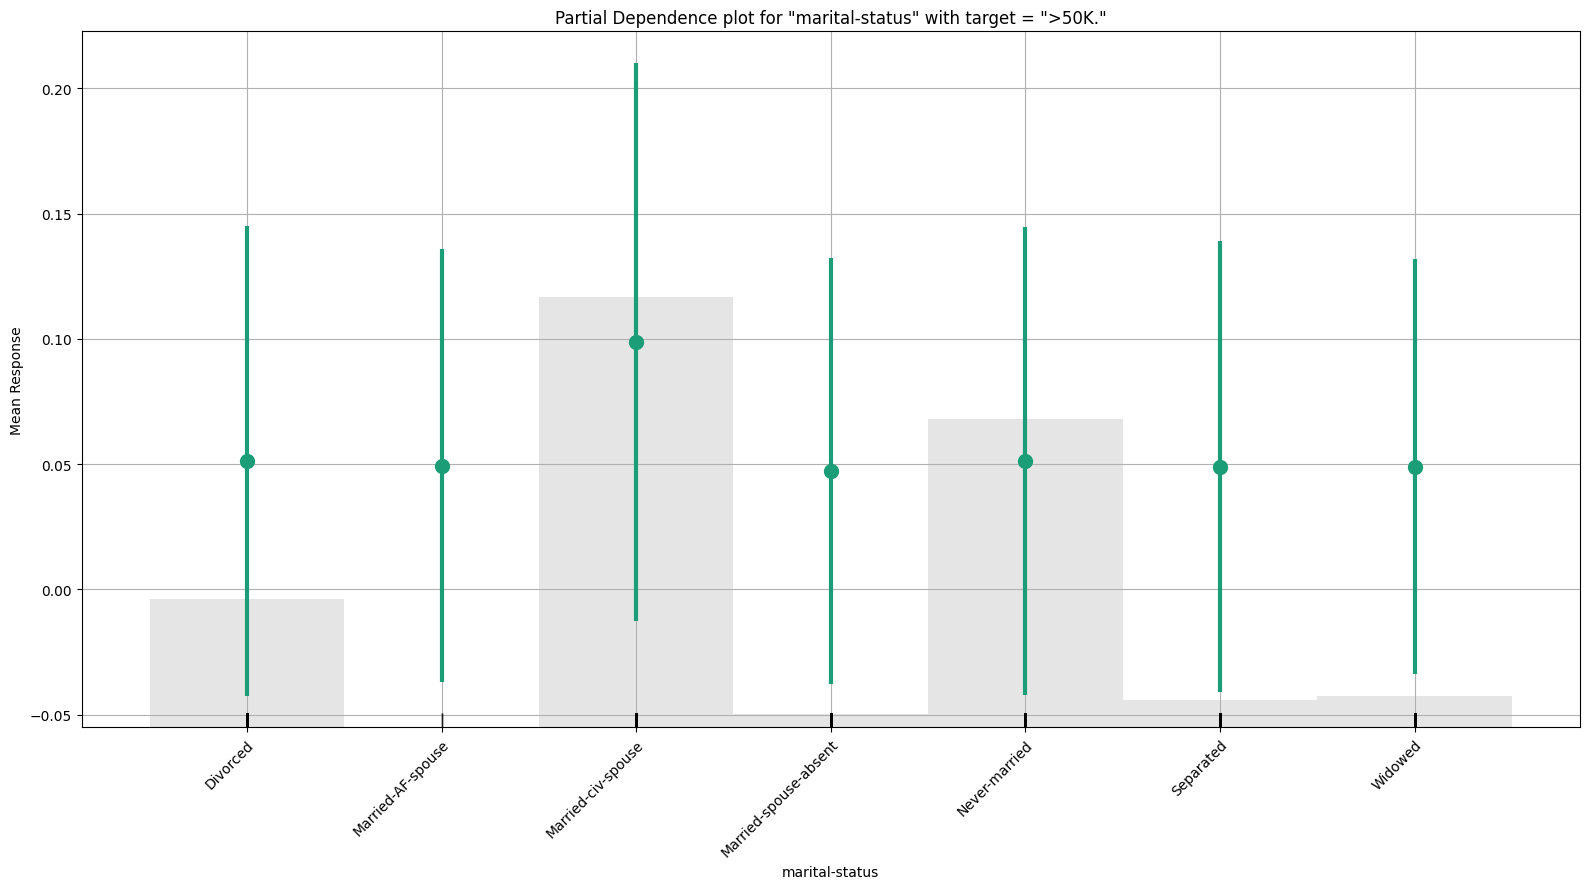

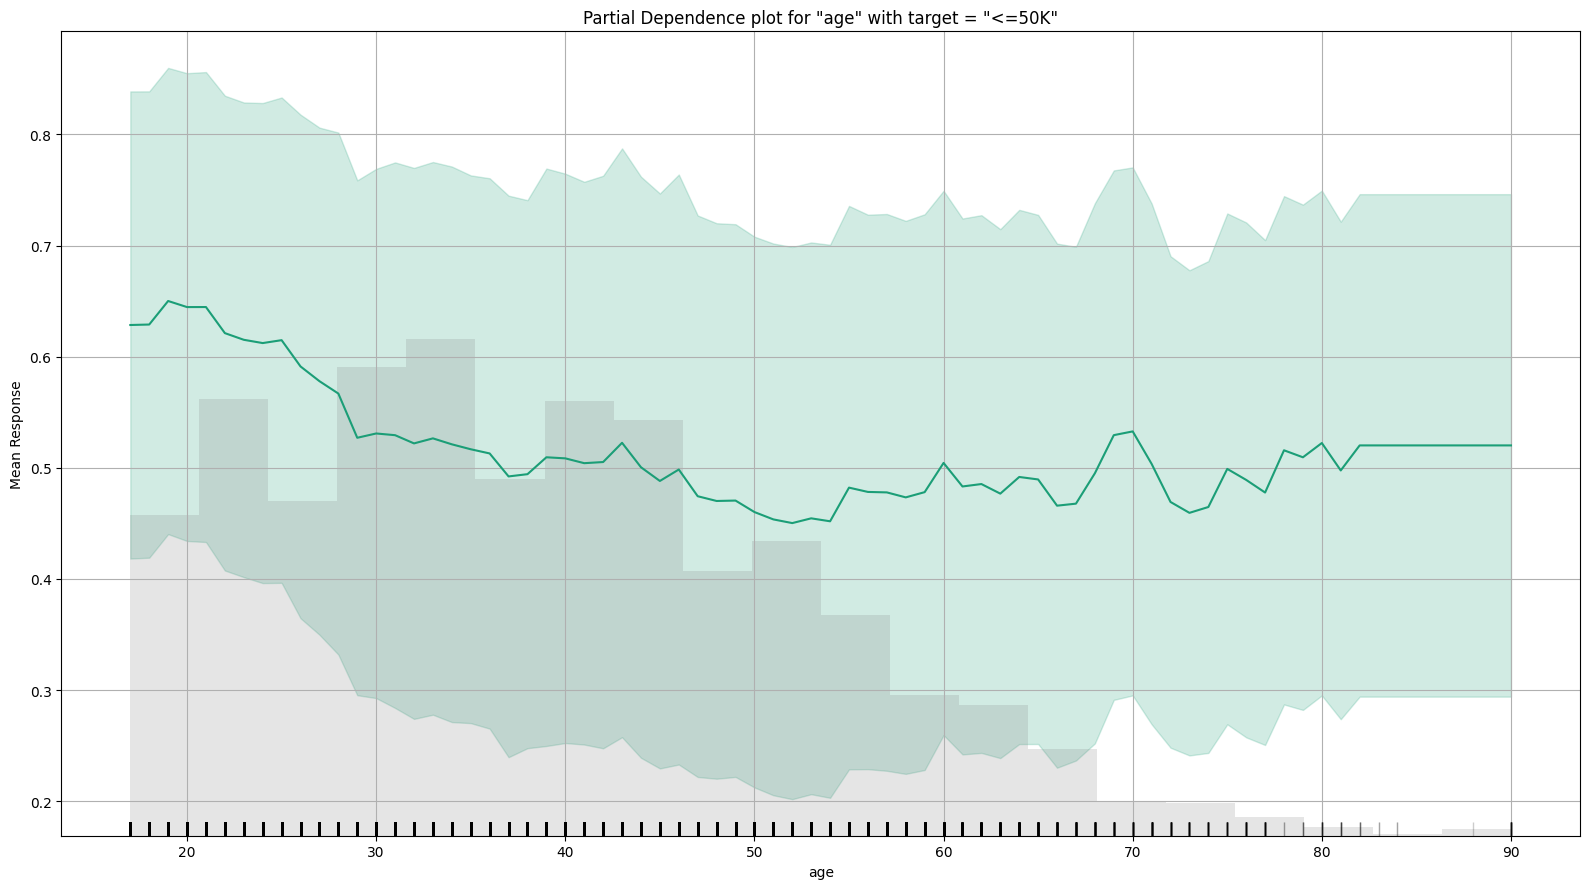

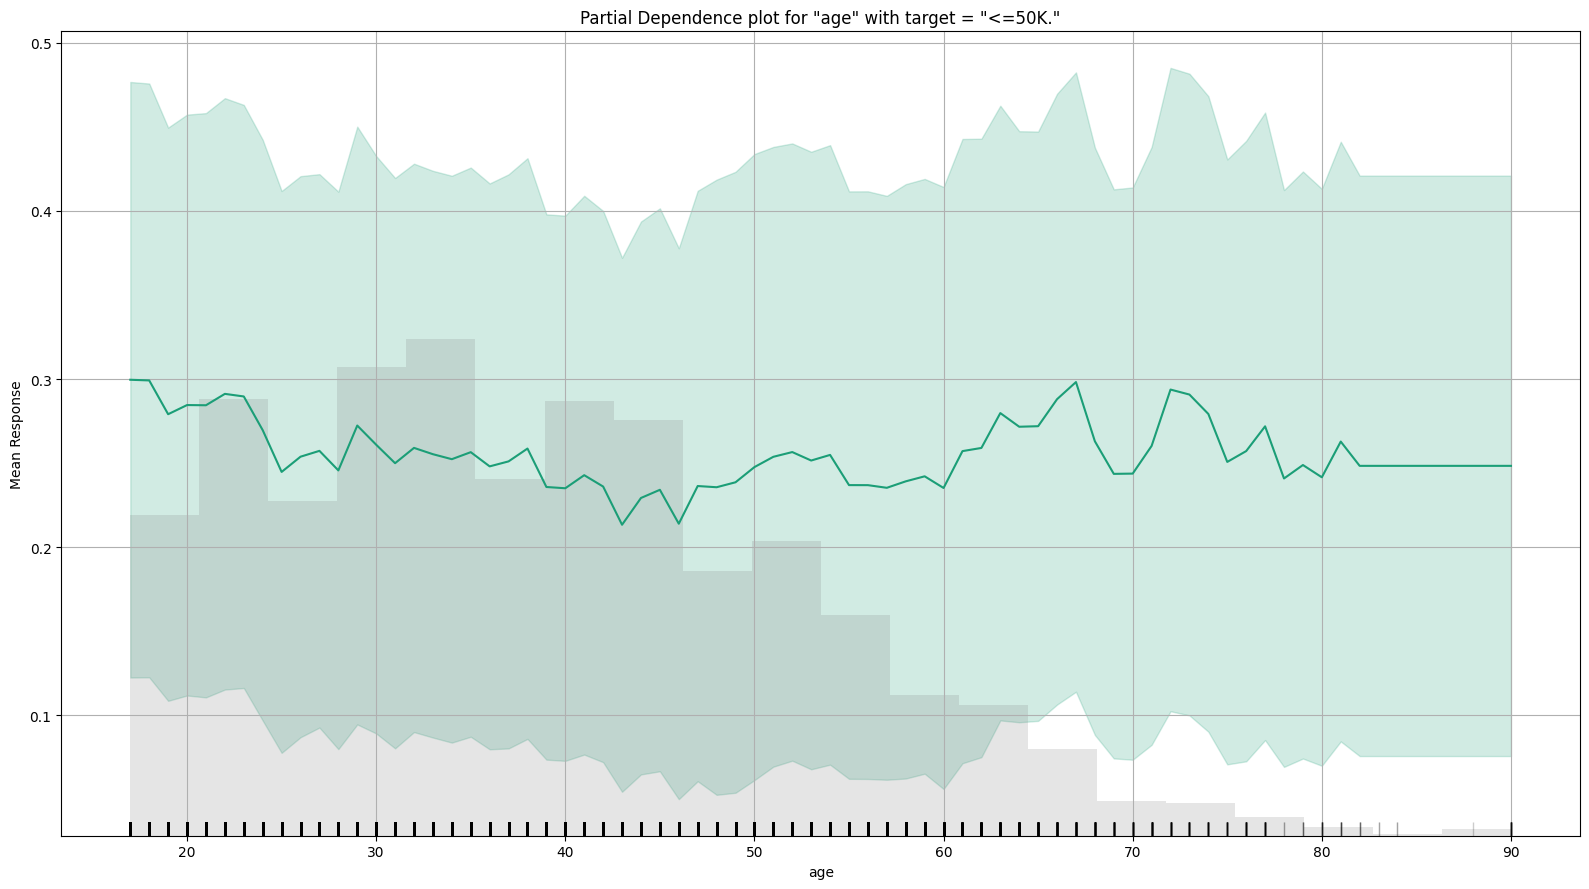

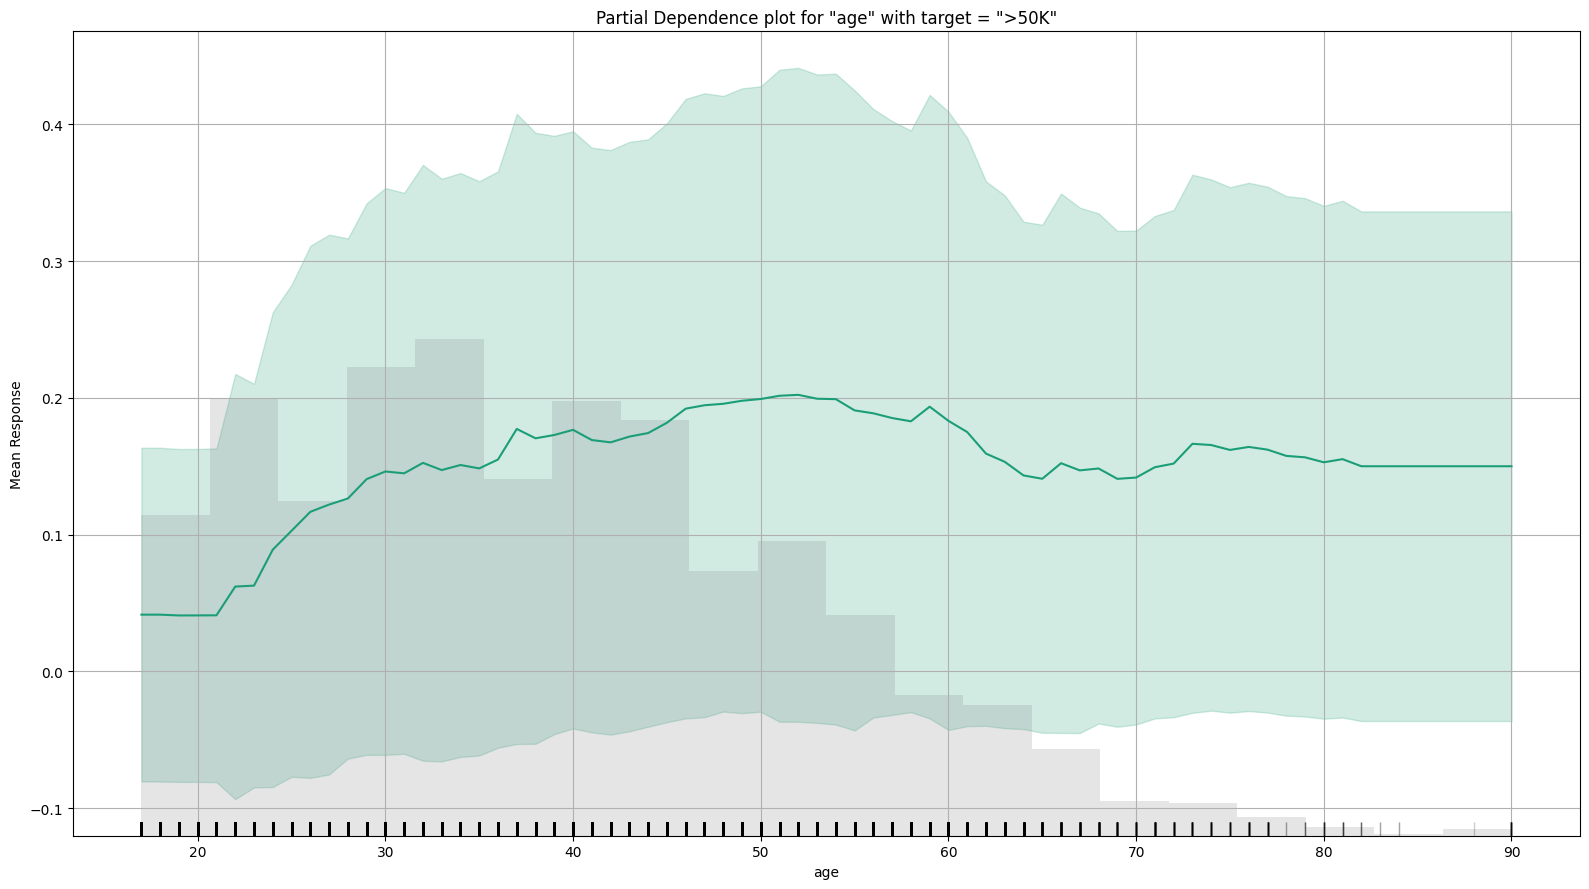

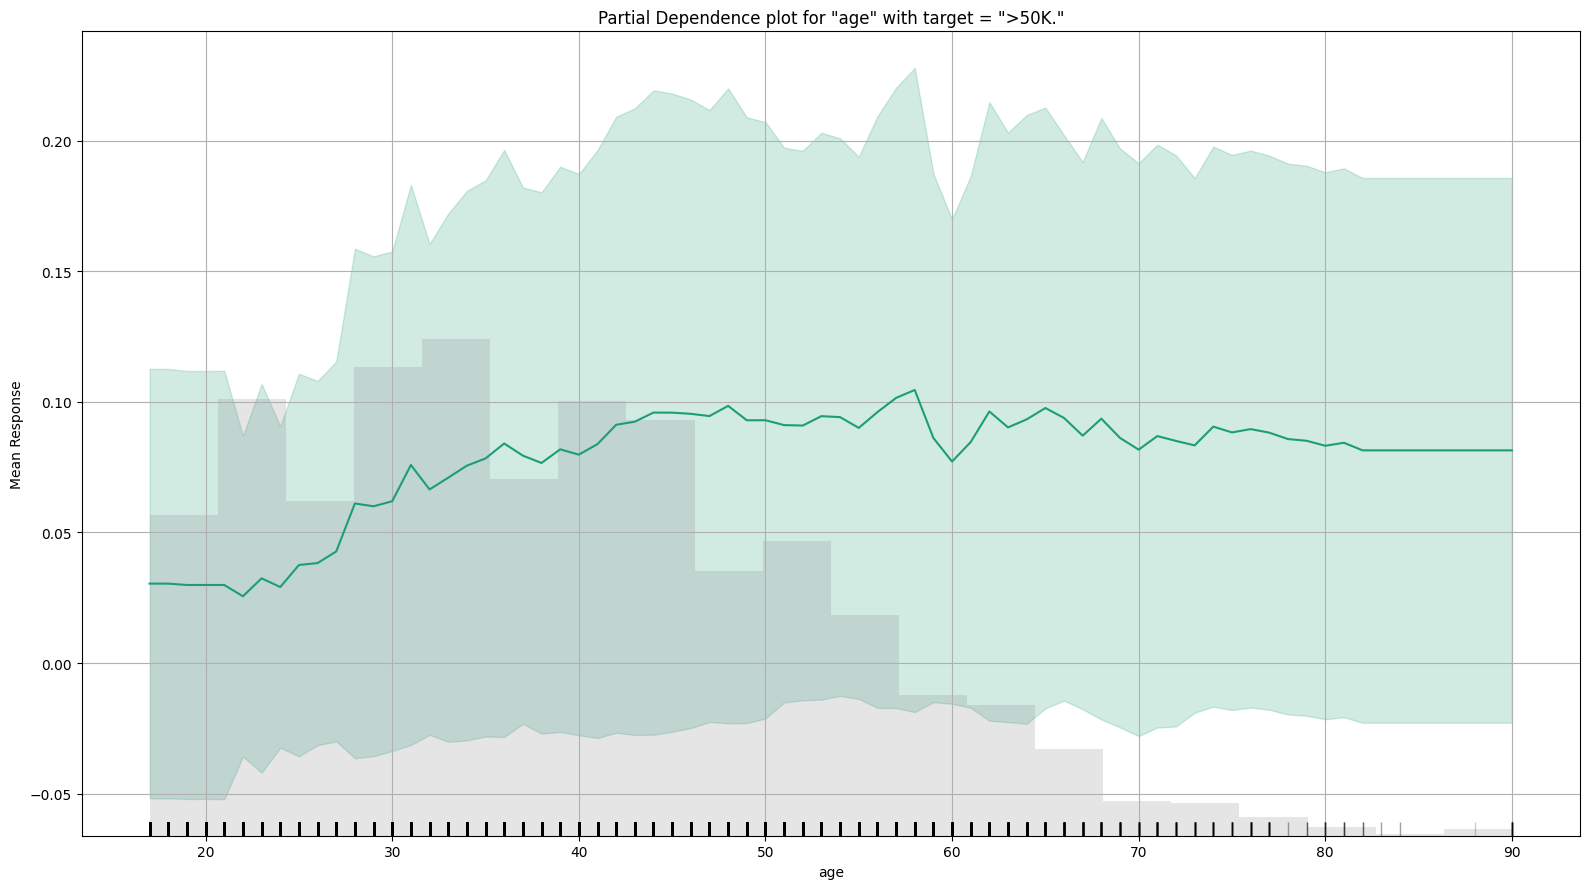

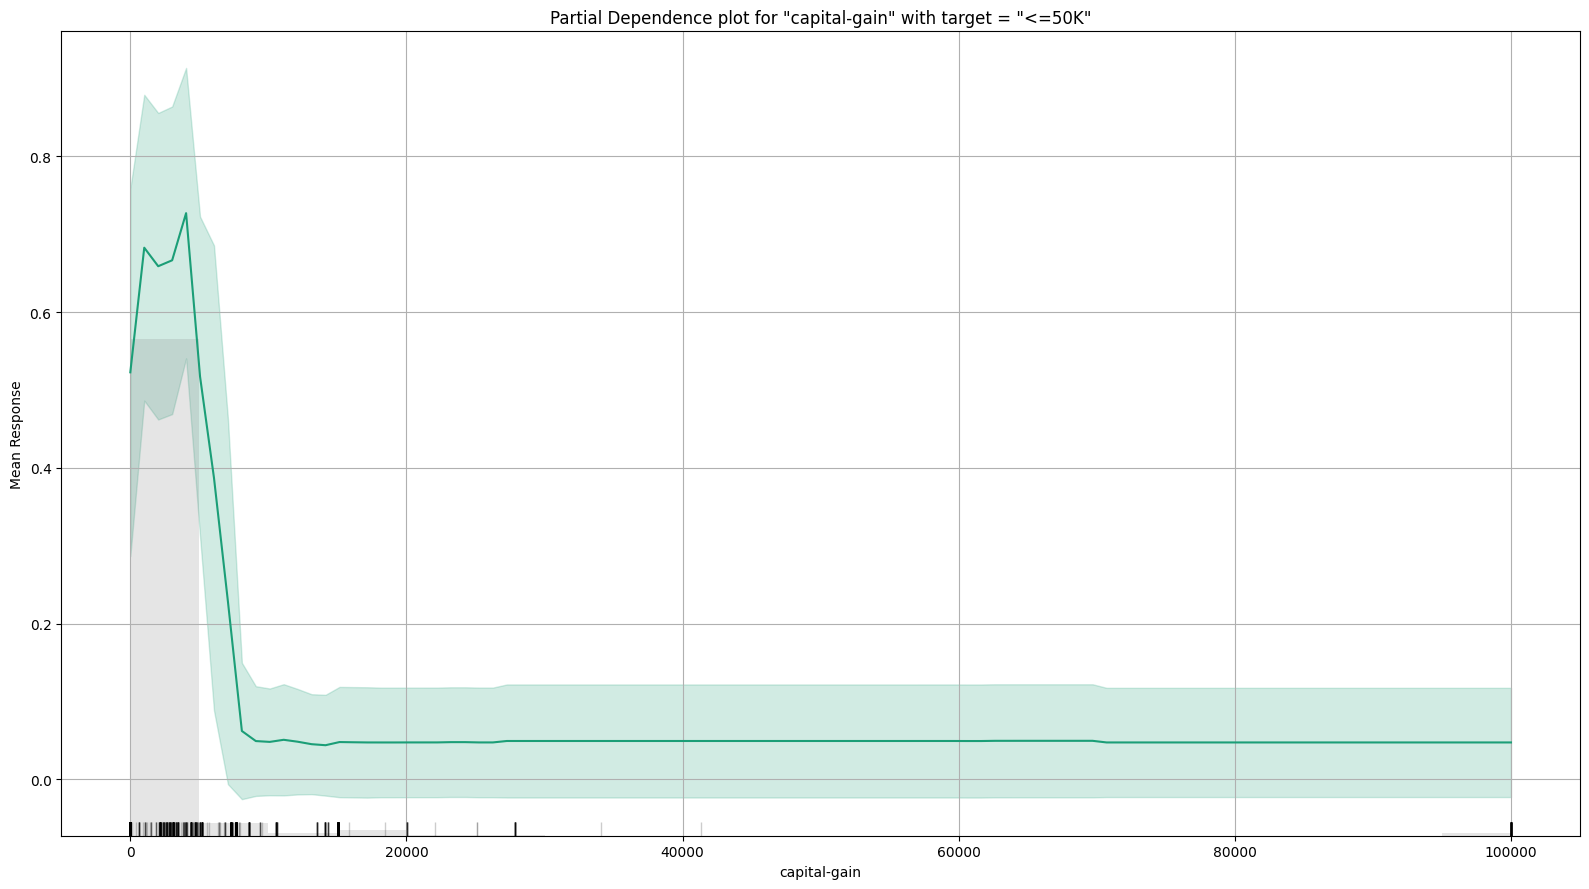

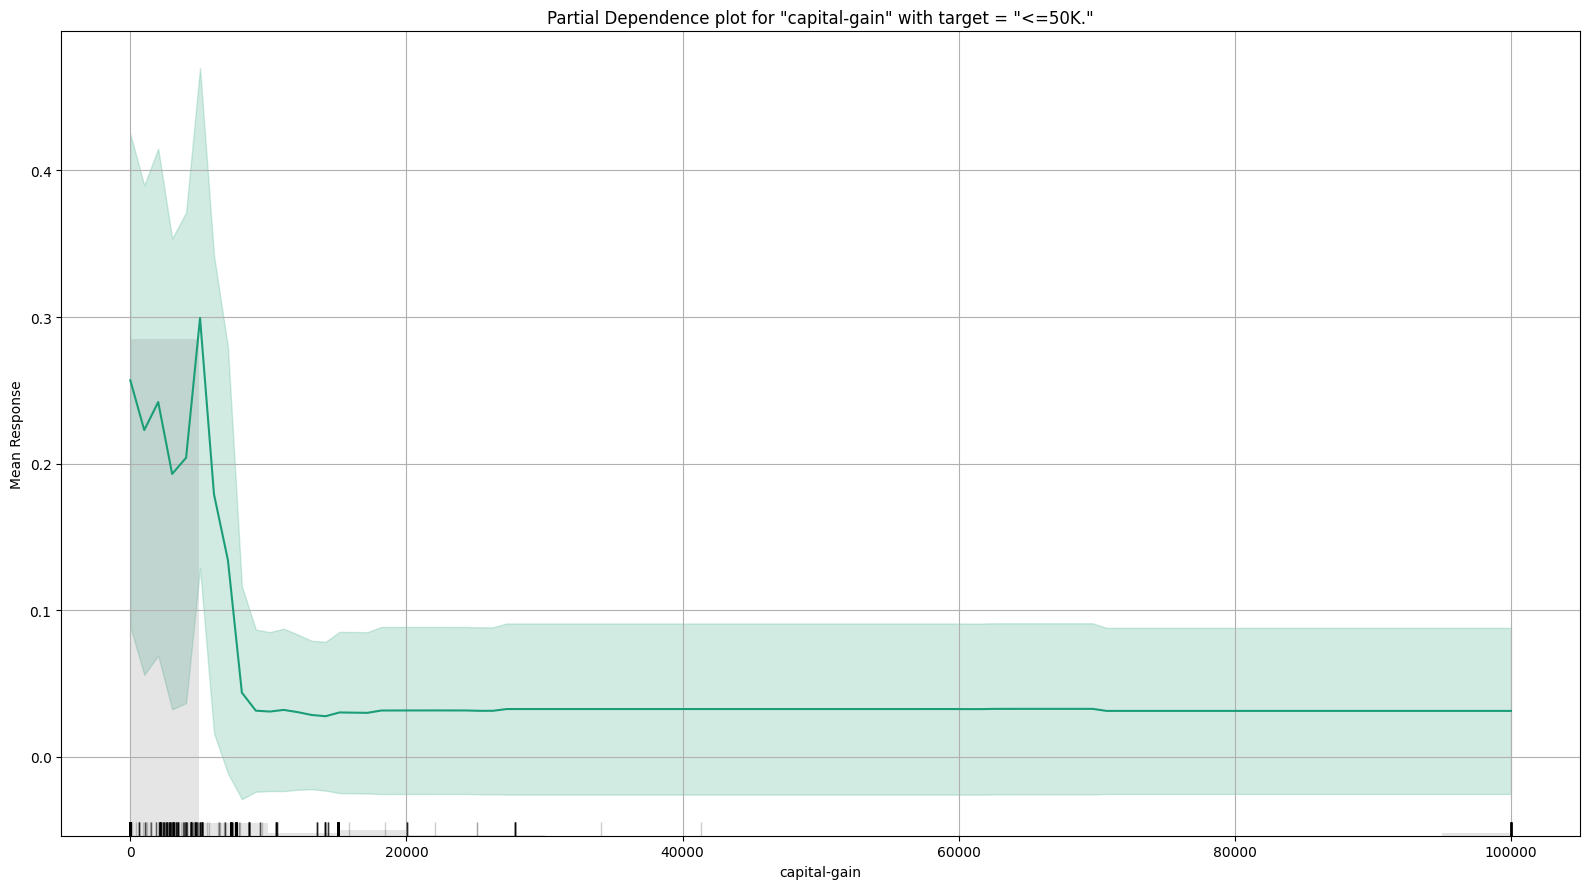

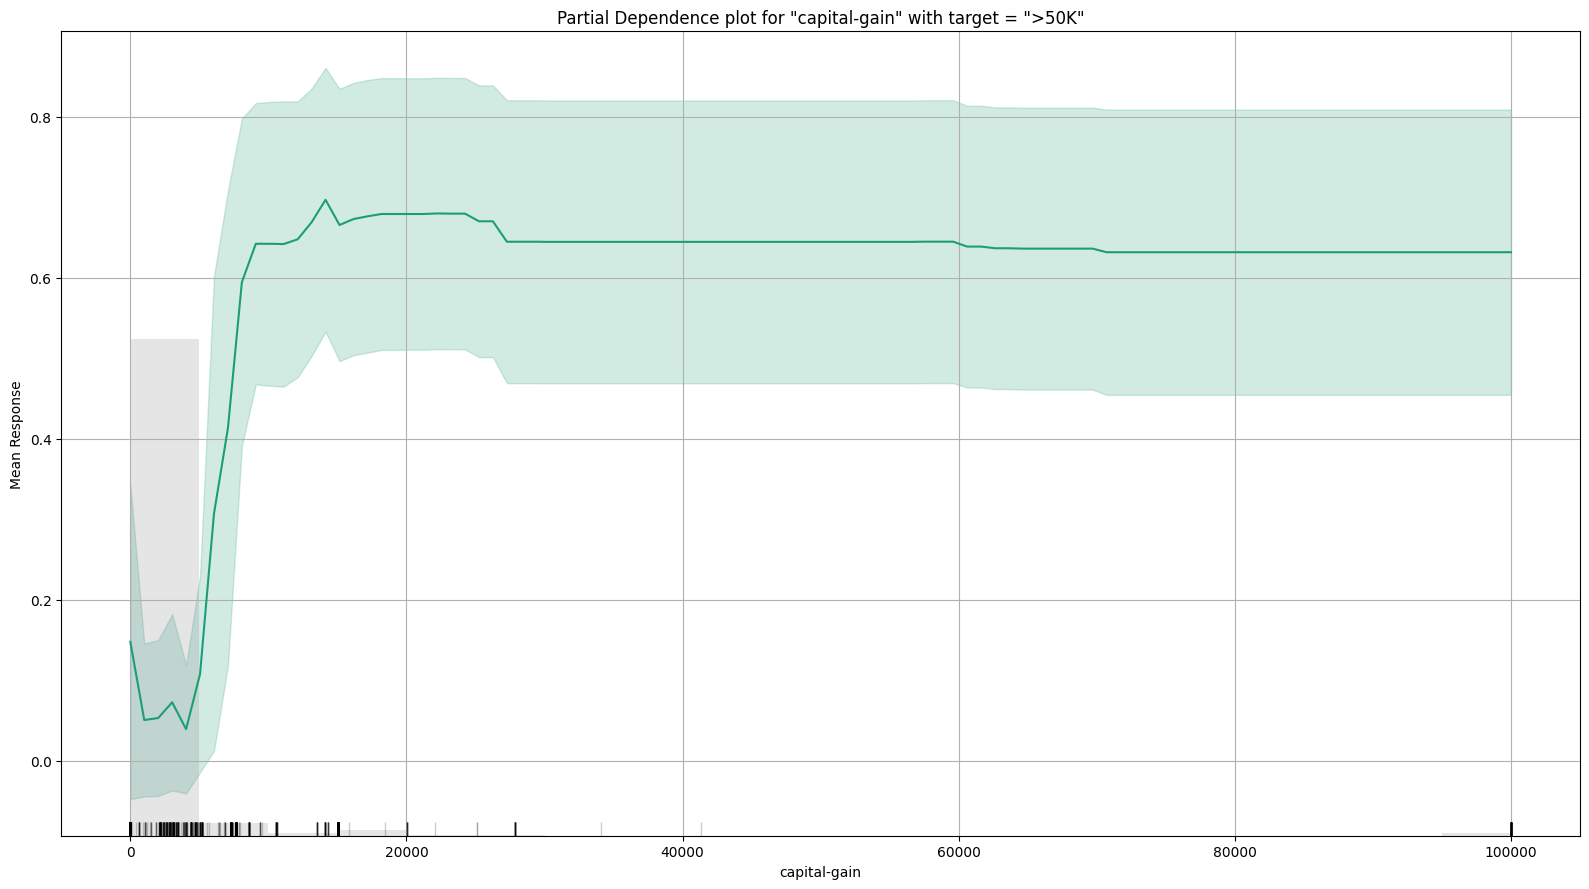

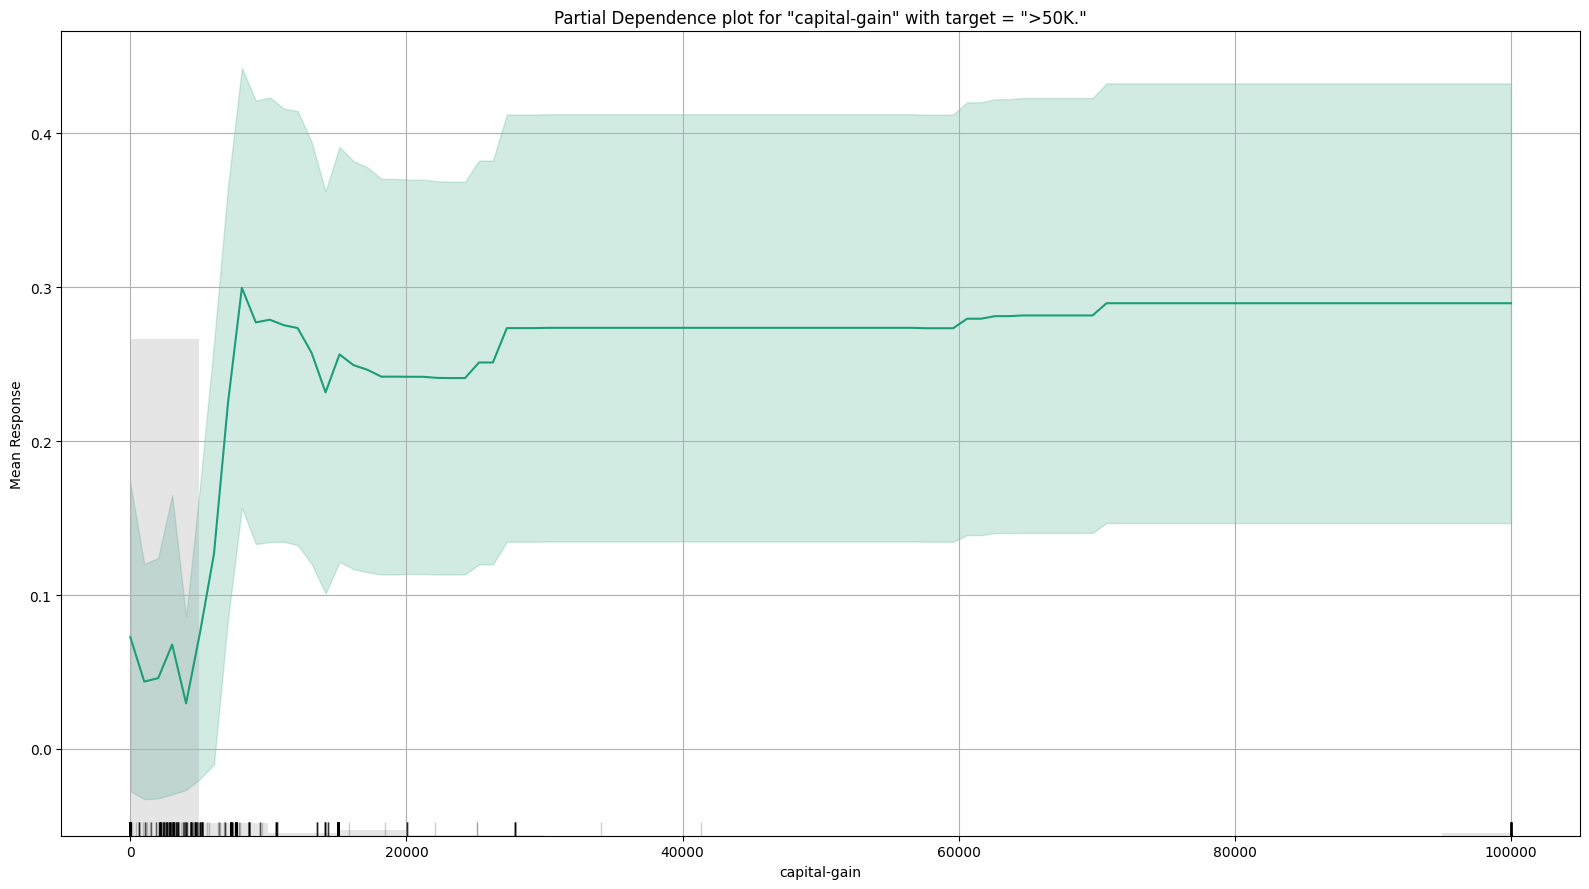

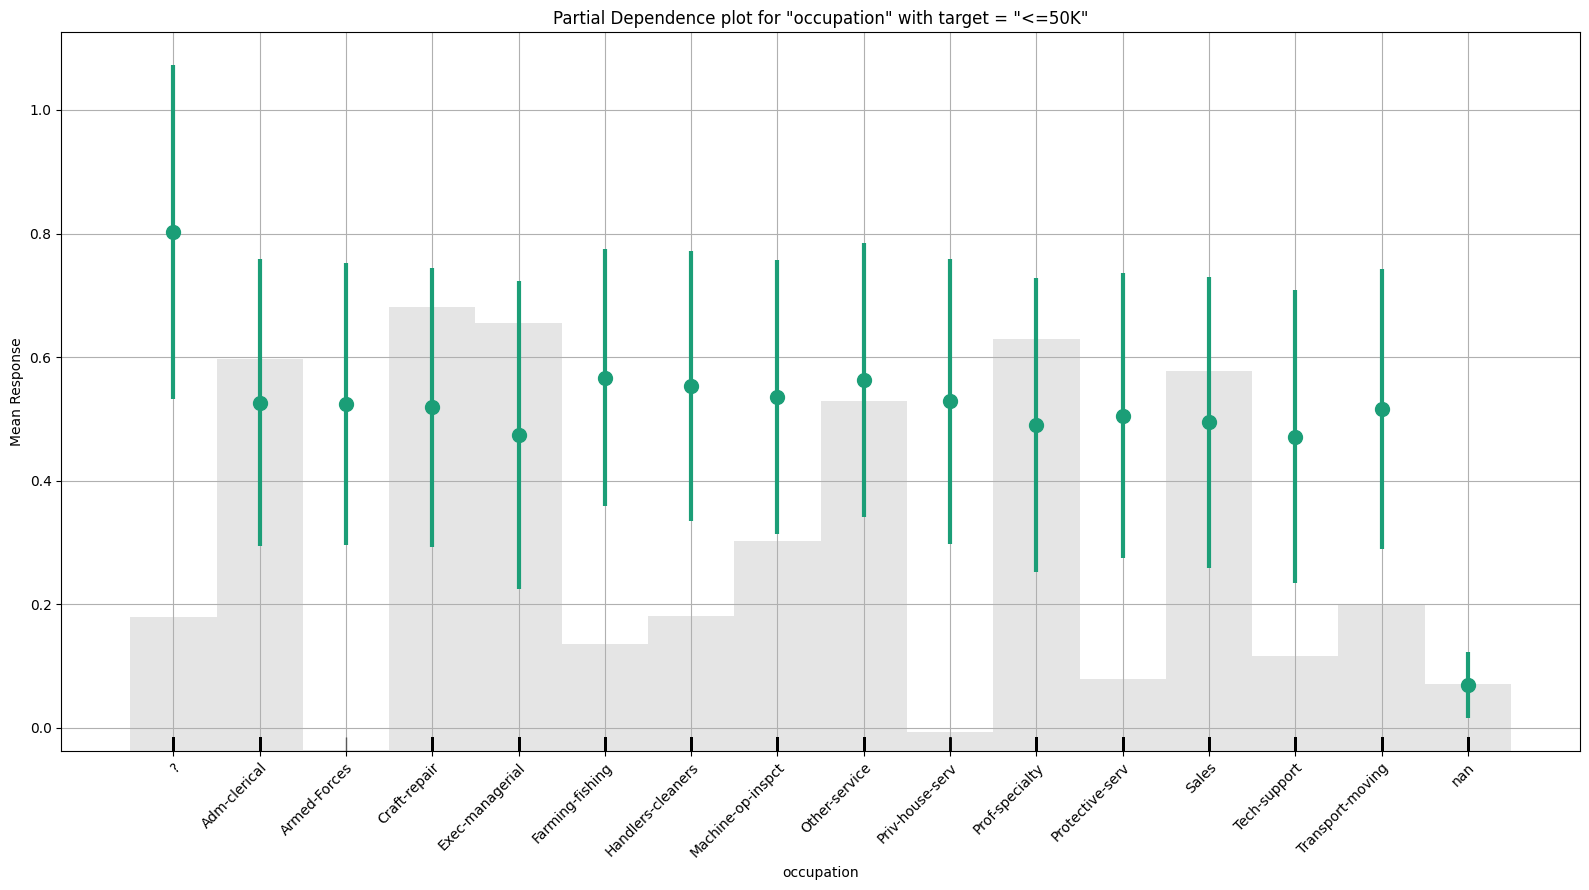

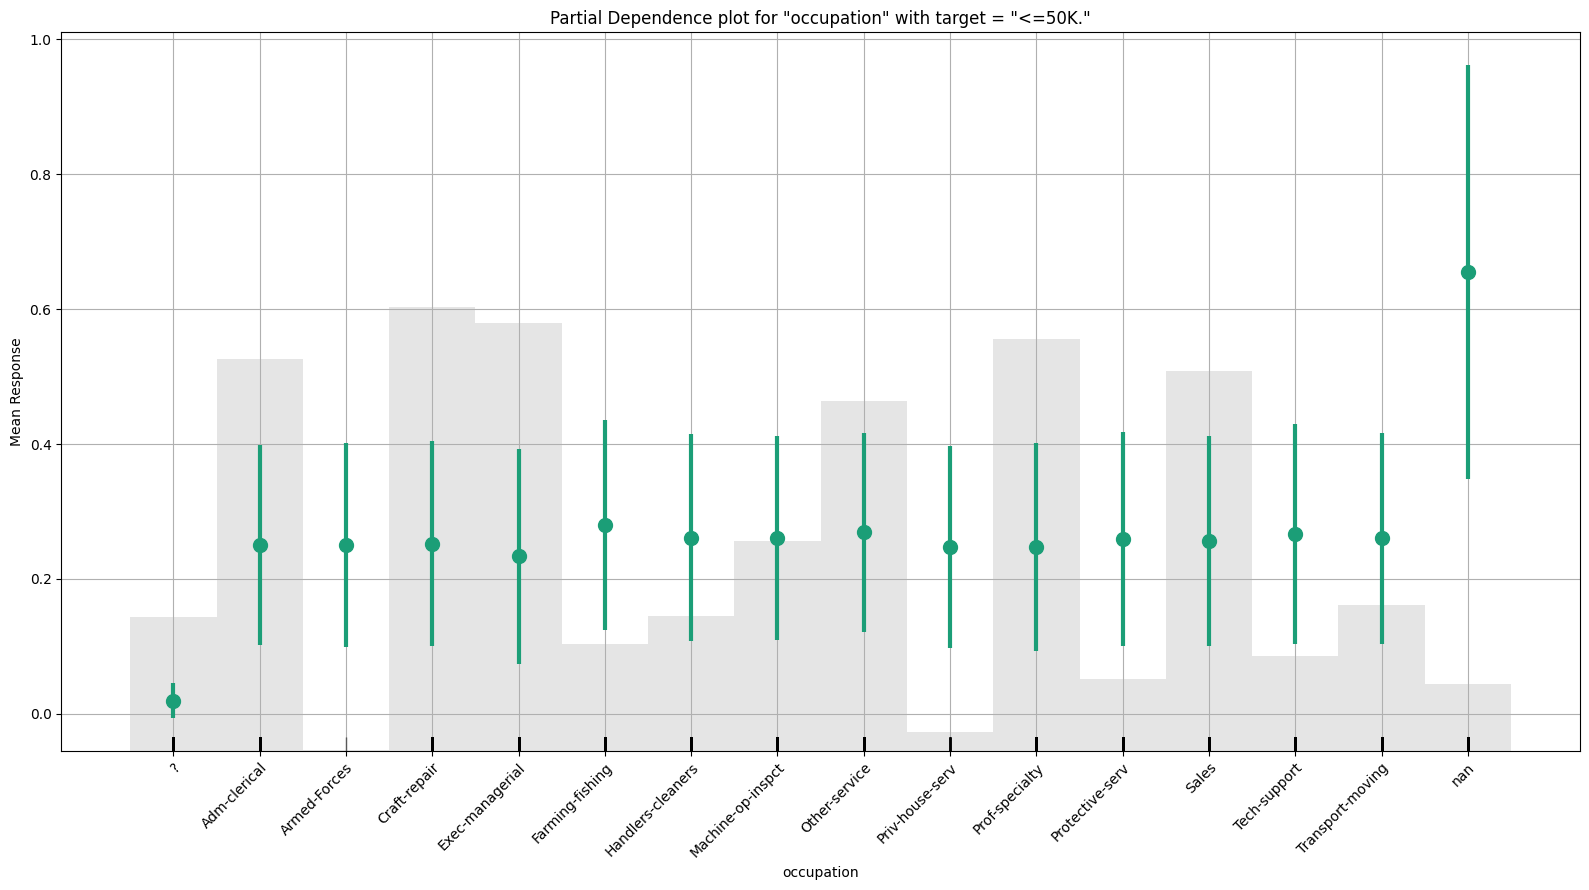

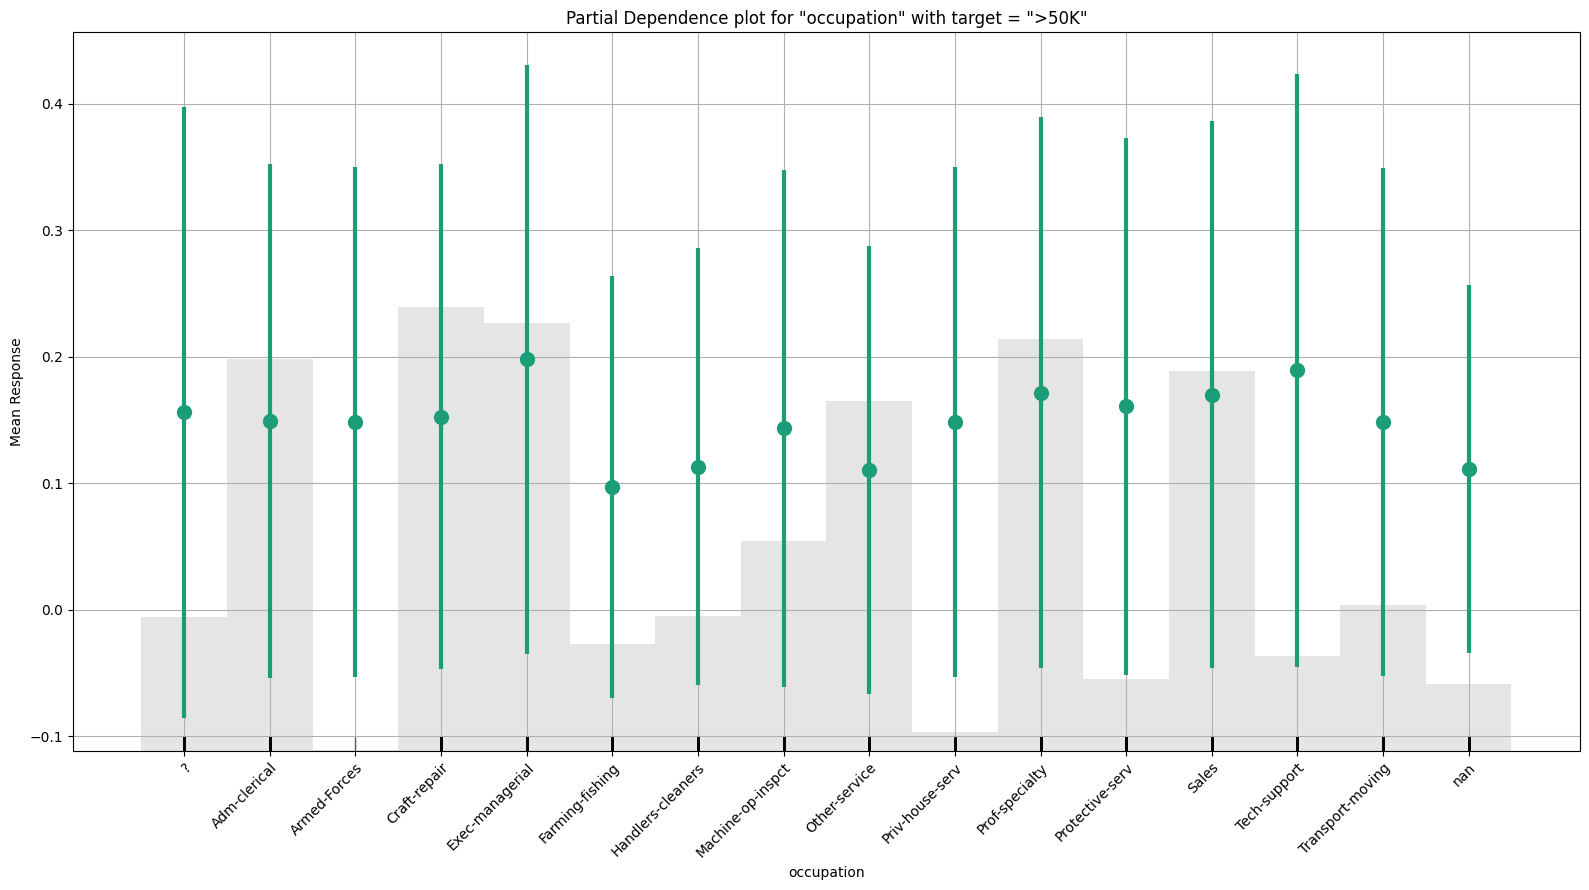

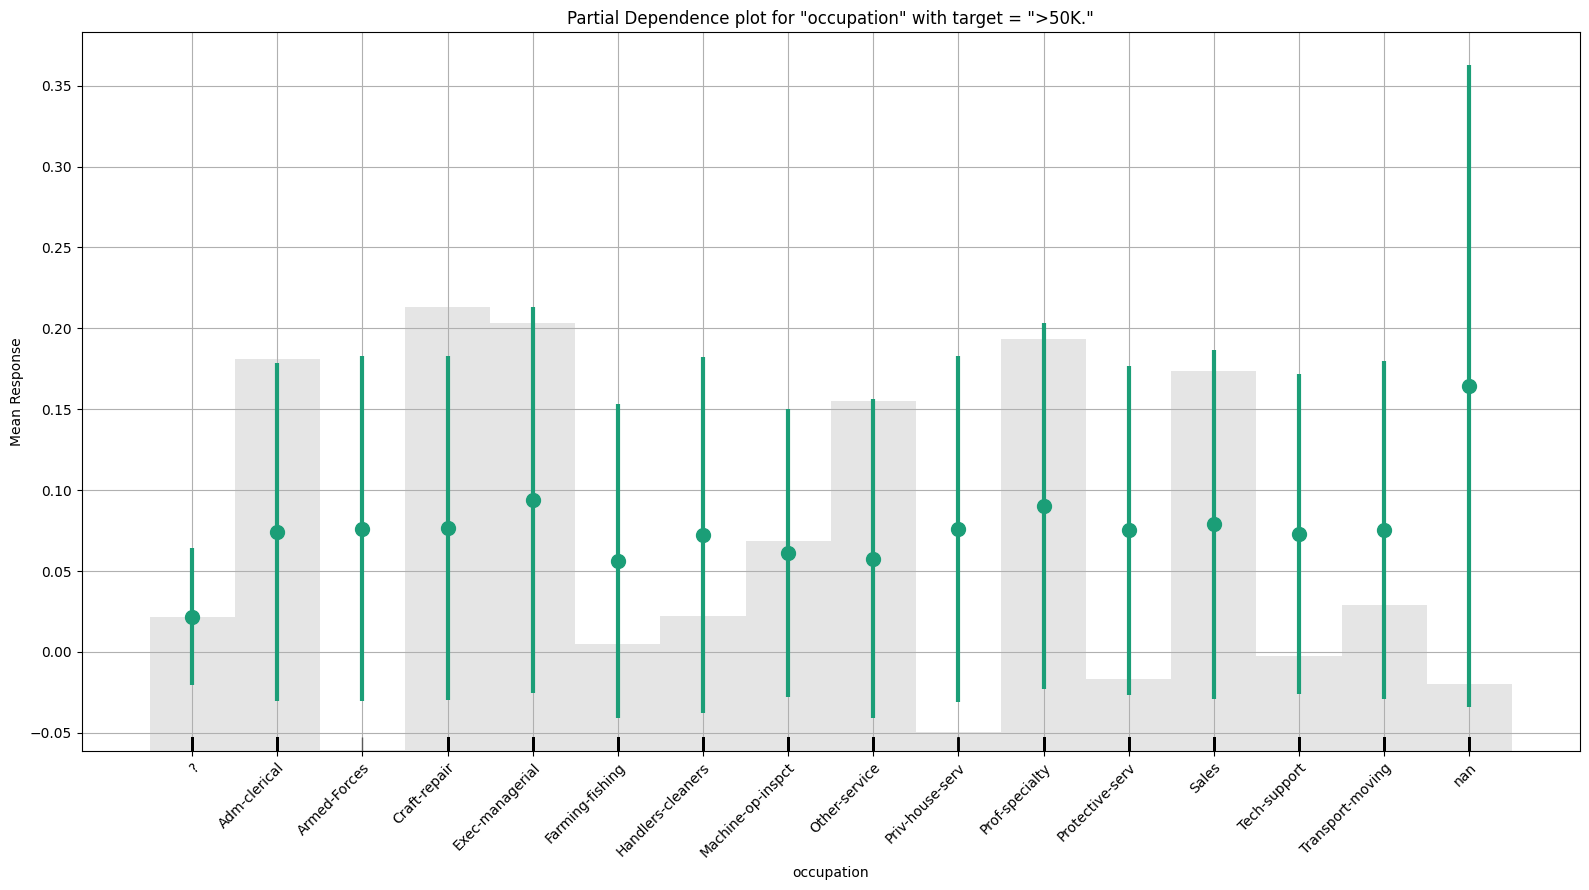

In [14]:
# Explain the leaderboard model & compare with all AutoML models
exa_leader = aml.leader.explain(test)

In [13]:
# To generate predictions on a test set, you can make predictions
# directly on the `H2OAutoML` object or on the leader model
# object directly
preds_leader = aml.leader.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [15]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id                                                   mean_per_class_error    logloss      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ----------------------  ---------  --------  --------  ------------------  -------------------------  ---------------
XGBoost_1_AutoML_1_20231008_162648                                     0.568256   0.910364  0.570409  0.325367               17940                   0.058656  XGBoost
GBM_1_AutoML_1_20231008_162648                                         0.578552   0.902389  0.571924  0.327097               16624                   0.079005  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20231008_162648                0.582051   0.889735  0.569003  0.323764                9484                   0.165179  StackedEnsemble
GLM_1_AutoML_1_20231008_162648                                         0.601496   0.921764  0.58008   0.336492               16523                   0.001006  GLM
[4 rows x 8 columns]

In [16]:
# Get the best model using the metric
m = aml.leader
# this is equivalent to
m = aml.get_best_model()

# Get the best model using a non-default metric
m = aml.get_best_model(criterion="logloss")

# Get the best XGBoost model using default sort metric
xgb = aml.get_best_model(algorithm="xgboost")

# Get the best XGBoost model, ranked by logloss
xgb = aml.get_best_model(algorithm="xgboost", criterion="logloss")